In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.linear_model import LinearRegression  # sklearn içinden LinearRegression sınıfını içe aktarın

dataFrame=pd.read_csv("students_mental_health.csv")
dataFrame

Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3                 5   

      Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality  \
0                 2          Good          Moderate         Good   
1                 0       Average               Low      Average   
2                 3          Good               Low      Average   
3                 0       Average               Low      Average   
4                 4          Good               Low      Average   
...             ...           ...               ...          ...   
7017              5          Good               Low         Poor   
7018              1          Good          Moderate      Average   
7019              1          Good              High         Poor   
7020              4       Average              High         Poor   
7021              0       Average              High      Average   

     Social_Support Relationship_Status Substance_Use Counseling_Service_Use  \
0          Moderate             Married         Never                  Never   
1               Low              Single  Occasionally           Occasionally   
2          Moderate   In a Relationship         Never           Occasionally   
3          Moderate              Single           NaN                  Never   
4              High             Married         Never                  Never   
...             ...                 ...           ...                    ...   
7017           High              Single         Never             Frequently   
7018           High              Single         Never           Occasionally   
7019       Moderate             Married         Never           Occasionally   
7020       Moderate              Single         Never                  Never   
7021       Moderate   In a Relationship         Never                  Never   

     Family_History Chronic_Illness  Financial_Stress  \
0                No              No                 2   
1                No              No                 3   
2                No              No                 4   
3                No              No                 4   
4                No             Yes                 0   
...             ...             ...               ...   
7017            Yes              No                 1   
7018             No              No                 3   
7019             No             Yes                 4   
7020             No             Yes                 4   
7021             No              No                 2   

     Extracurricular_Involvement  Semester_Credit_Load Residence_Type  
0                       Moderate                    17      On-Campus  
1                            Low                    27      On-Campus  
2                           High                    15      On-Campus  
3                       Moderate                    20     Off-Campus  
4                           High                    23      On-Campus  
...                          ...                   ...            ...  
7017                        High                    26     Off-Campus  
7018                         Low          

In [2]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [3]:
dataFrame.describe()

Age        CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
count  7022.000000  7010.00000   7022.000000       7022.000000    7022.000000   
mean     23.003418     3.49127      2.427941          2.254486       2.300484   
std       3.853978     0.28742      1.638408          1.625193       1.624305   
min      18.000000     2.44000      0.000000          0.000000       0.000000   
25%      20.000000     3.29000      1.000000          1.000000       1.000000   
50%      22.000000     3.50000      2.000000          2.000000       2.000000   
75%      25.000000     3.70000      4.000000          3.000000       4.000000   
max      35.000000     4.00000      5.000000          5.000000       5.000000   

       Financial_Stress  Semester_Credit_Load  
count       7022.000000           7022.000000  
mean           2.453005             22.010538  
std            1.708995              4.358380  
min            0.000000             15.000000  
25%            1.000000             18.000000  
50%            2.000000             22.000000  
75%            4.000000             26.000000  
max            5.000000             29.000000

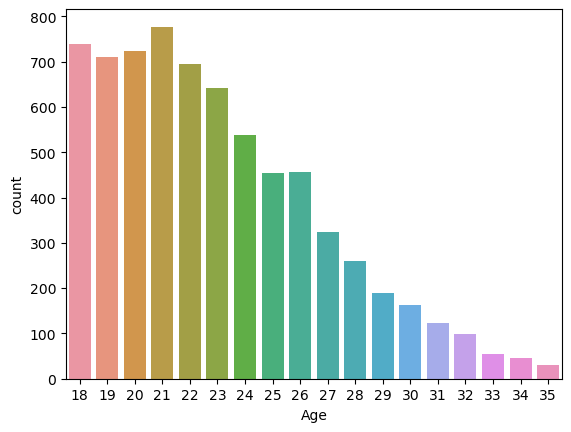

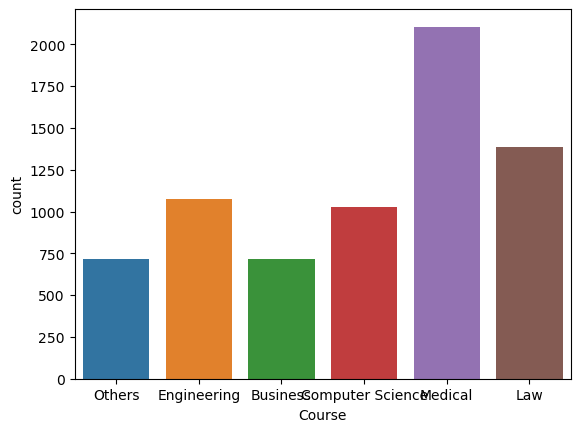

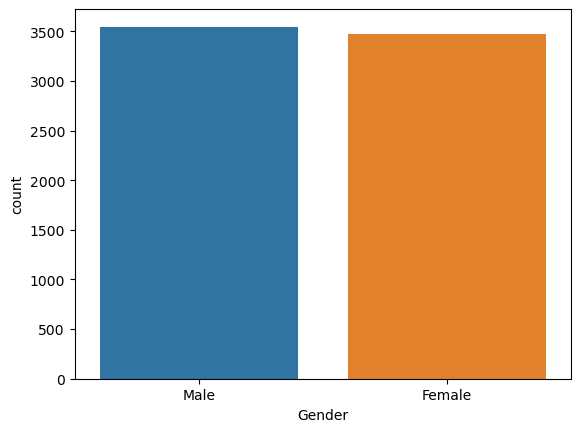

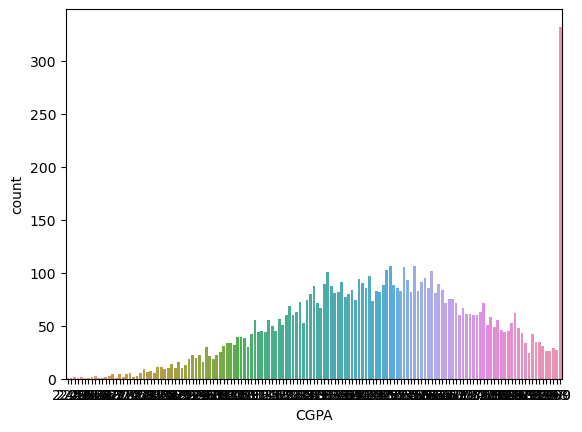

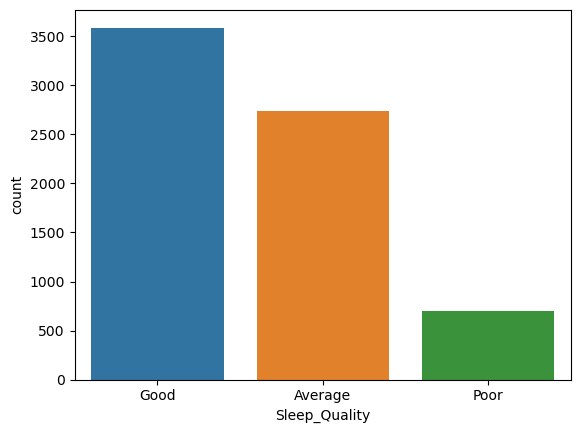

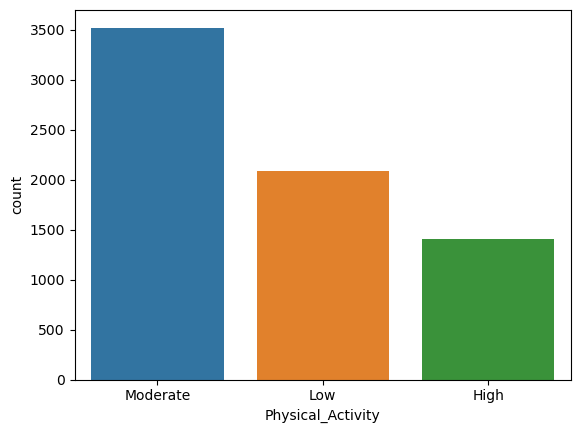

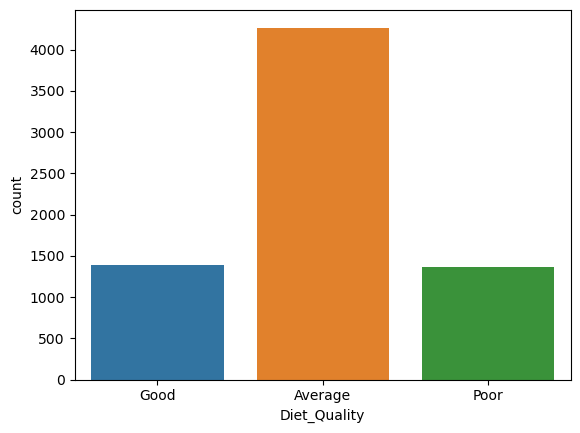

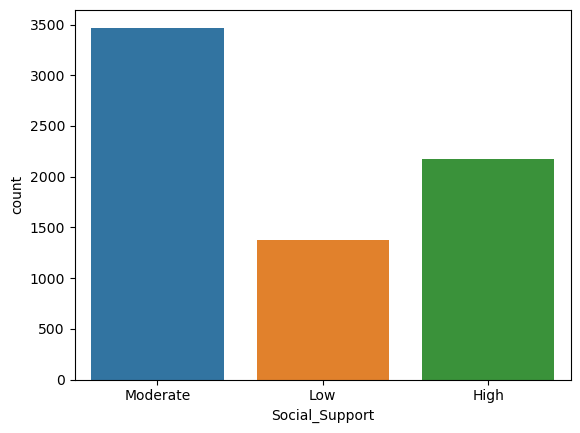

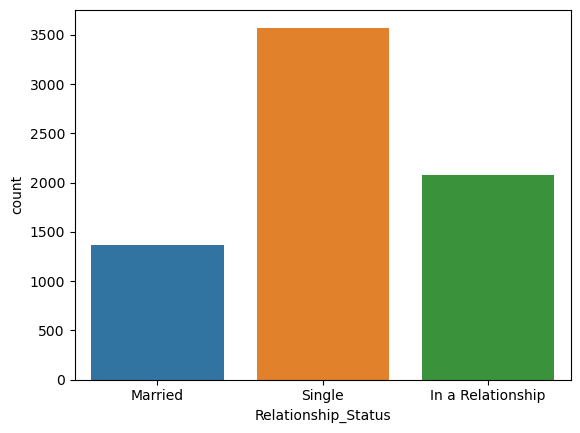

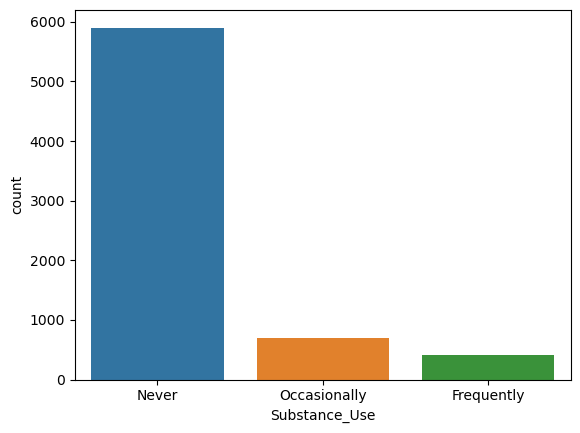

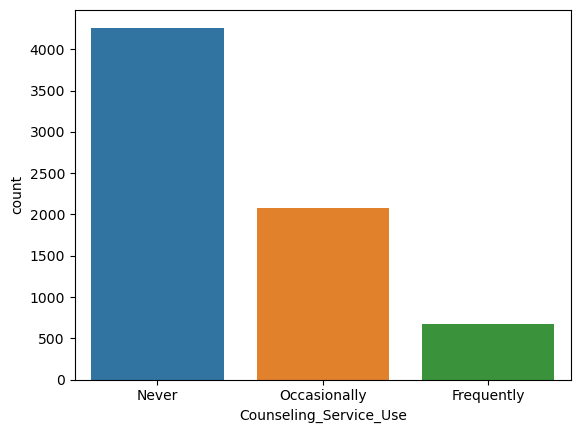

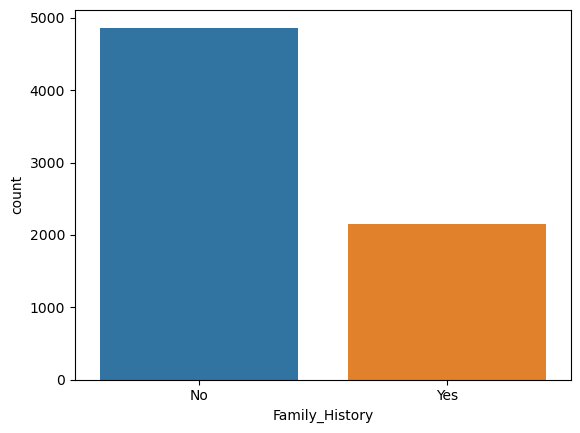

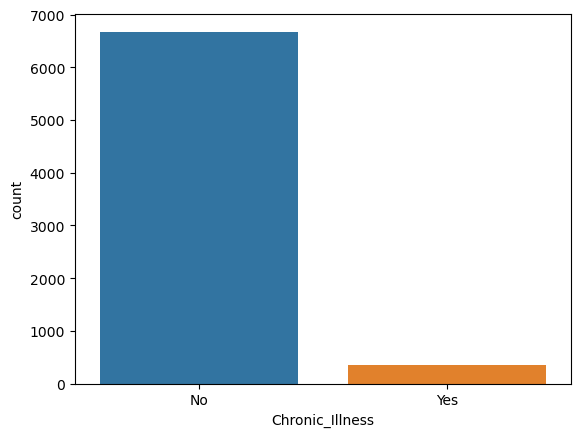

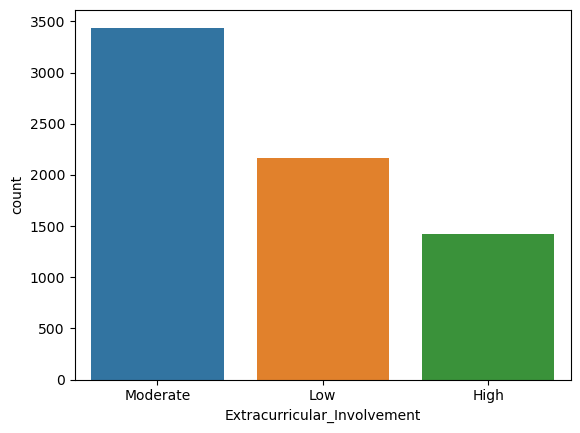

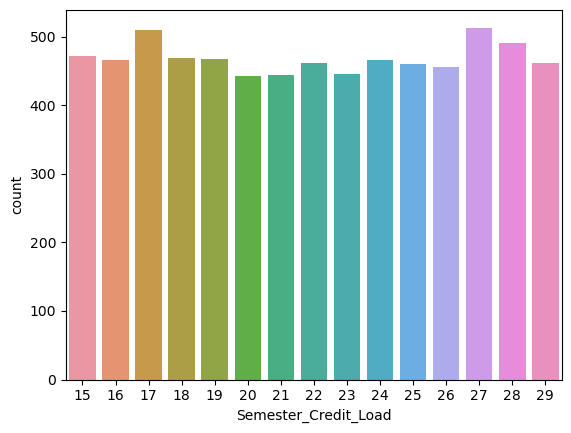

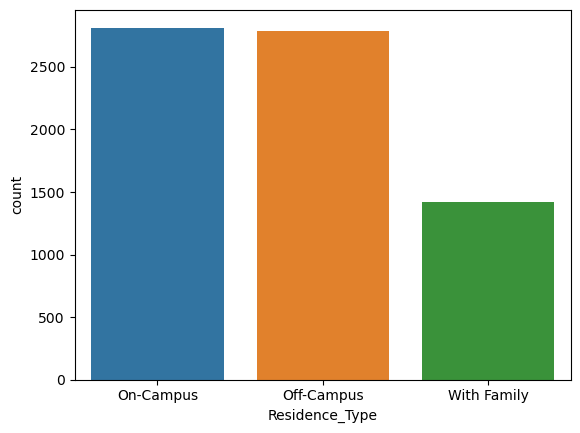

In [4]:
dataColumnX=["Age","Course","Gender","CGPA","Sleep_Quality","Physical_Activity","Diet_Quality","Social_Support","Relationship_Status","Substance_Use","Counseling_Service_Use","Family_History","Chronic_Illness","Extracurricular_Involvement","Semester_Credit_Load","Residence_Type"]

for column in dataColumnX:
    sns.countplot(x=column,data=dataFrame)
    plt.title=f'{column} dağılımı'
    plt.show()

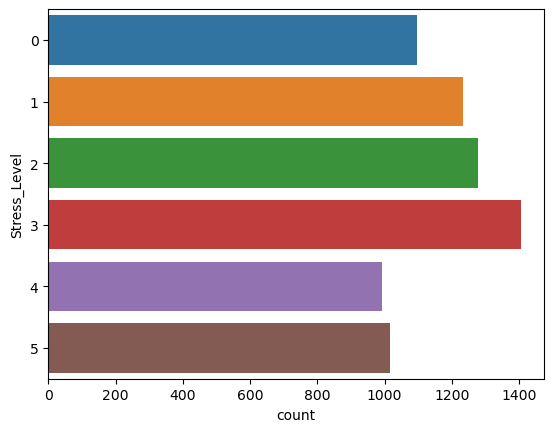

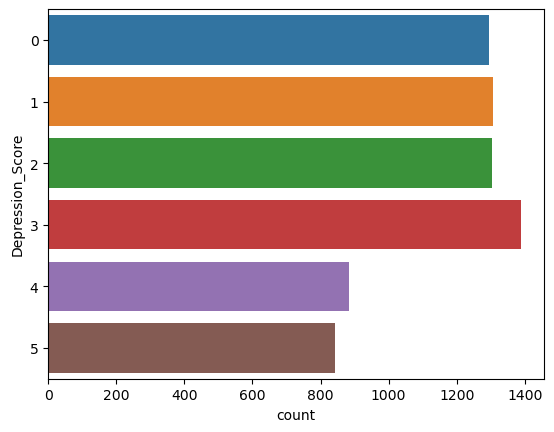

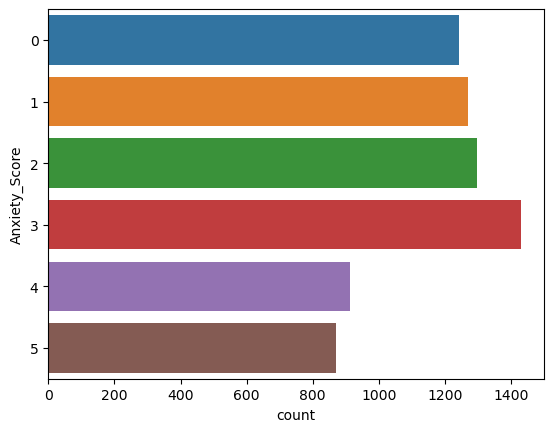

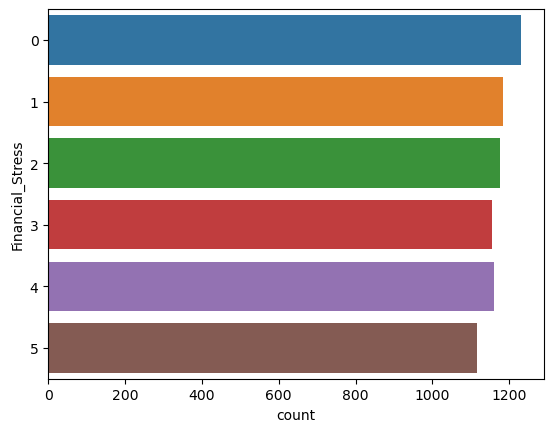

In [5]:
dataColumnY=["Stress_Level", "Depression_Score" ,"Anxiety_Score", "Financial_Stress"]

for column in dataColumnY:
    sns.countplot(y=column,data=dataFrame)
    plt.title=f'{column} dağılımı'
    plt.show()

In [6]:
matchingGender={"Female":1,"Male":0}
dataFrame['Gender'] = dataFrame['Gender'].replace(matchingGender)

matchingCourser={
    "Others":0.0,
    "Engineering":.15,
    "Business":0.30,
    "Computer Science":0.45,
    "Medical":0.60,
    "Law":0.75,
}
dataFrame['Course'] = dataFrame['Course'].replace(matchingCourser)

matchingSleepQuality={
    "Good":1.0,
    "Average":0.5,
    "Poor":0.0
}
dataFrame['Sleep_Quality'] = dataFrame['Sleep_Quality'].replace(matchingSleepQuality)

matchingPhysicalActivity={
    "Low":0.0,
    "Moderate":0.5,
    "High":1.0
}
dataFrame['Physical_Activity'] = dataFrame['Physical_Activity'].replace(matchingPhysicalActivity)

matchingDietQuality={
    "Good":1.0,
    "Average":0.5,
    "Poor":0.0
}
dataFrame['Diet_Quality'] = dataFrame['Diet_Quality'].replace(matchingDietQuality)

matchingSocialSupport={
    "Low":1.0,
    "Moderate":0.5,
    "High":0.0
}
dataFrame['Social_Support'] = dataFrame['Social_Support'].replace(matchingSocialSupport)

matchingRelationshipStatus={
    "Married":0.0,
    "In a Relationship":0.5,
    "Single":1.0
}
dataFrame['Relationship_Status'] = dataFrame['Relationship_Status'].replace(matchingRelationshipStatus)

matchingSubstanceUse={
    "Never":0.0,
    "Occasionally":0.5,
    "Frequently":1.0
}
dataFrame['Substance_Use'] = dataFrame['Substance_Use'].replace(matchingSubstanceUse)

matchingCounselingServiceUse={
    "Never":0.0,
    "Occasionally":0.5,
    "Frequently":1.0
}
dataFrame['Counseling_Service_Use'] = dataFrame['Counseling_Service_Use'].replace(matchingCounselingServiceUse)

matchingFamilyHistory={
    "No":0,
    "Yes":1
}
dataFrame['Family_History'] = dataFrame['Family_History'].replace(matchingFamilyHistory)

matchingChronicIllness={
    "No":0,
    "Yes":1
}
dataFrame['Chronic_Illness'] = dataFrame['Chronic_Illness'].replace(matchingChronicIllness)

matchingExtracurricularInvolvement={
    "Low":0.0,
    "Moderate":0.5,
    "High":1.0
}
dataFrame['Extracurricular_Involvement'] = dataFrame['Extracurricular_Involvement'].replace(matchingExtracurricularInvolvement)

matchingResidenceType={
    "With Family":0.0,
    "Off-Campus":0.5,
    "On-Campus":1.0
}
dataFrame['Residence_Type'] = dataFrame['Residence_Type'].replace(matchingResidenceType)

In [7]:
dataFrame
xData=["Age","Course","Gender","Sleep_Quality","Physical_Activity","Diet_Quality","Social_Support","Relationship_Status","Counseling_Service_Use","Family_History","Chronic_Illness","Extracurricular_Involvement","Semester_Credit_Load","Residence_Type"]
yData=["Stress_Level", "Depression_Score" ,"Anxiety_Score", "Financial_Stress"]
dataFrame=dataFrame.dropna()
dataFrame.isnull().sum()
dataFrame.shape

(6995, 20)


Hedef Değişken: Stress_Level
R-Kare Skoru: 0.012916233571506841
MAE: 1.3907654666231177
MSE: 2.625756465410542


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


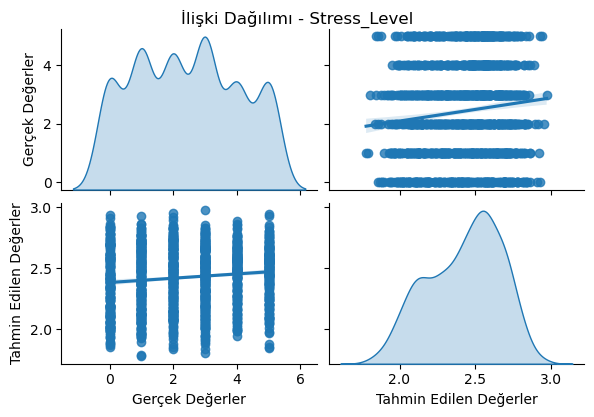


Hedef Değişken: Depression_Score
R-Kare Skoru: -0.010473570114042152
MAE: 1.3945464758677106
MSE: 2.6515696812438705


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


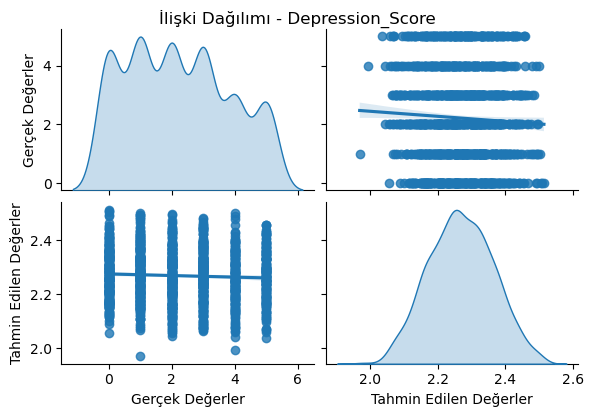


Hedef Değişken: Anxiety_Score
R-Kare Skoru: 0.023336866828993275
MAE: 1.3814339545254137
MSE: 2.5843974361974245


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


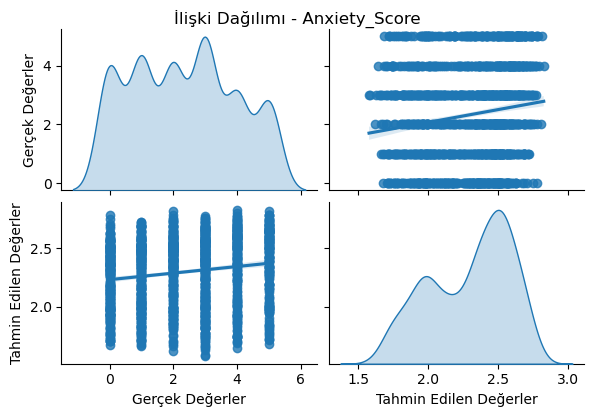


Hedef Değişken: Financial_Stress
R-Kare Skoru: -0.008603583697870176
MAE: 1.5323866537792756
MSE: 3.0376257125428645


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


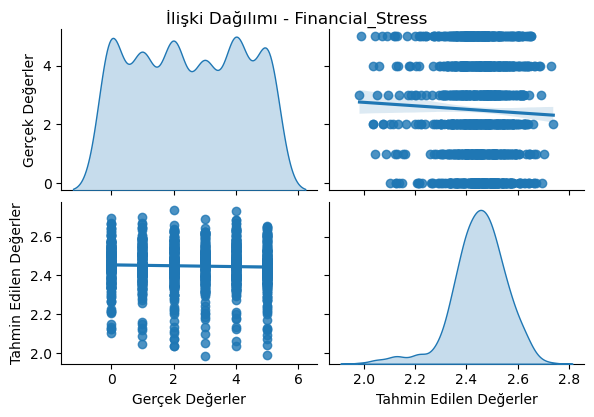

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleme veya oluşturma işlemleri buraya eklenebilir.

# Özellik ve hedef değişkenleri seçme
X = dataFrame[xData]

# Veriyi eğitim ve test setlerine ayırma
#for yCol in yData:
X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[0]], test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini hesaplama
LinearRegression_r2_zeroth = r2_score(y_test, y_pred)
LinearRegression_mae_zeroth = mean_absolute_error(y_test, y_pred)
LinearRegression_mse_zeroth = mean_squared_error(y_test, y_pred)

# Sonuçları ayrı ayrı yazdırma
print(f"\nHedef Değişken: {yData[0]}")
print(f'R-Kare Skoru: {LinearRegression_r2_zeroth}')
print(f'MAE: {LinearRegression_mae_zeroth}')
print(f'MSE: {LinearRegression_mse_zeroth}')

# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'İlişki Dağılımı - {yData[0]}', y=1.02)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[1]], test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini hesaplama
LinearRegression_r2_first = r2_score(y_test, y_pred)
LinearRegression_mae_first = mean_absolute_error(y_test, y_pred)
LinearRegression_mse_first = mean_squared_error(y_test, y_pred)

# Sonuçları ayrı ayrı yazdırma
print(f"\nHedef Değişken: {yData[1]}")
print(f'R-Kare Skoru: {LinearRegression_r2_first}')
print(f'MAE: {LinearRegression_mae_first}')
print(f'MSE: {LinearRegression_mse_first}')

# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'İlişki Dağılımı - {yData[1]}', y=1.02)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[2]], test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini hesaplama
LinearRegression_r2_second = r2_score(y_test, y_pred)
LinearRegression_mae_second = mean_absolute_error(y_test, y_pred)
LinearRegression_mse_second = mean_squared_error(y_test, y_pred)

# Sonuçları ayrı ayrı yazdırma
print(f"\nHedef Değişken: {yData[2]}")
print(f'R-Kare Skoru: {LinearRegression_r2_second}')
print(f'MAE: {LinearRegression_mae_second}')
print(f'MSE: {LinearRegression_mse_second}')

# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'İlişki Dağılımı - {yData[2]}', y=1.02)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[3]], test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini hesaplama
LinearRegression_r2_third = r2_score(y_test, y_pred)
LinearRegression_mae_third = mean_absolute_error(y_test, y_pred)
LinearRegression_mse_third = mean_squared_error(y_test, y_pred)

# Sonuçları ayrı ayrı yazdırma
print(f"\nHedef Değişken: {yData[3]}")
print(f'R-Kare Skoru: {LinearRegression_r2_third}')
print(f'MAE: {LinearRegression_mae_third}')
print(f'MSE: {LinearRegression_mse_third}')

# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'İlişki Dağılımı - {yData[3]}', y=1.02)
plt.show()



C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

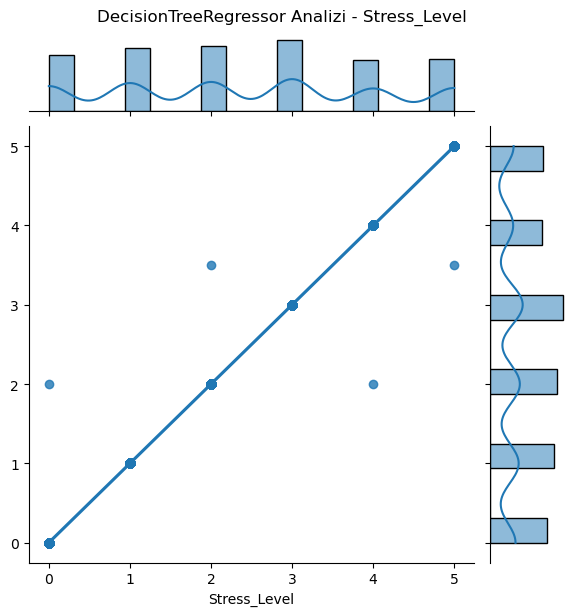

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


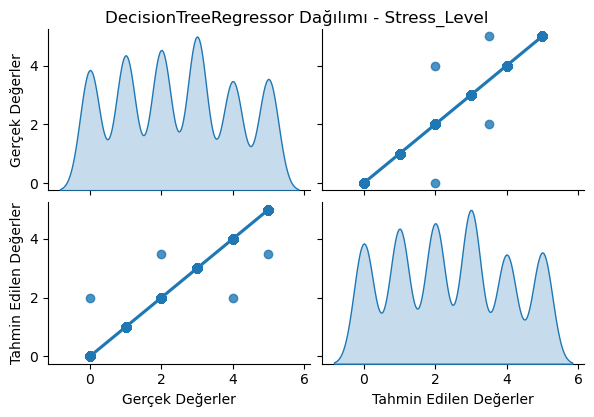


Hedef Değişken: Stress_Level
R-Kare Skoru: 0.99933475016933
MAE: 0.0010007147962830592
MSE: 0.0017869907076483202


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

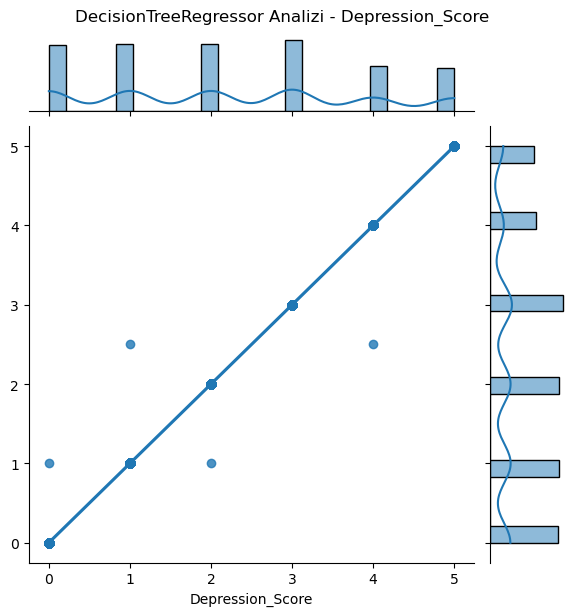

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


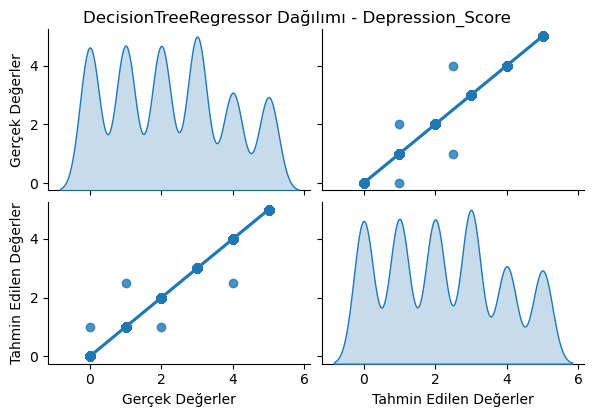


Hedef Değişken: Depression_Score
R-Kare Skoru: 0.9996479921948603
MAE: 0.0007147962830593281
MSE: 0.0009292351679771265


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

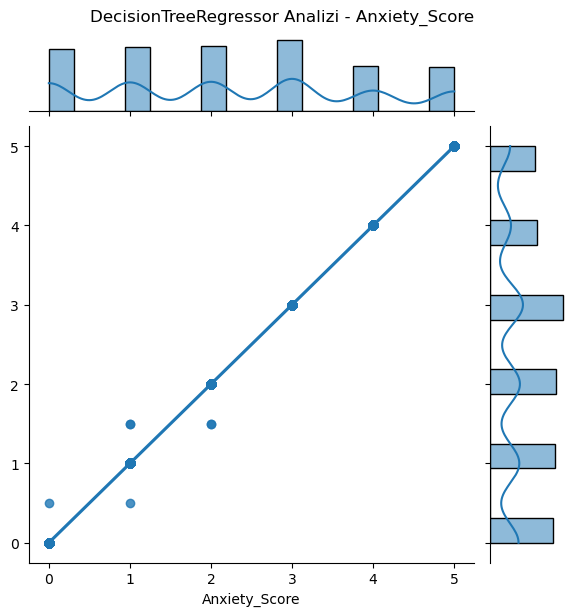

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


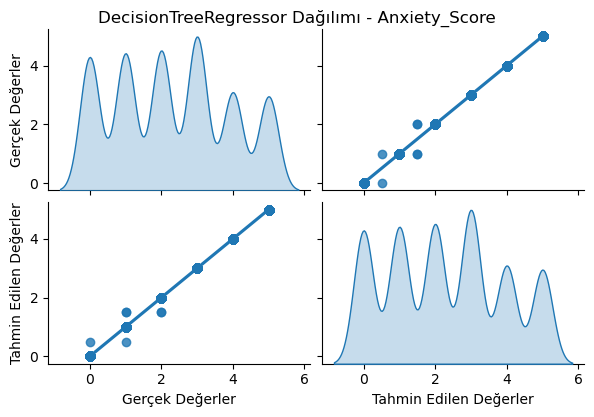


Hedef Değişken: Anxiety_Score
R-Kare Skoru: 0.9999187146557882
MAE: 0.00042887776983559683
MSE: 0.00021443888491779842


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

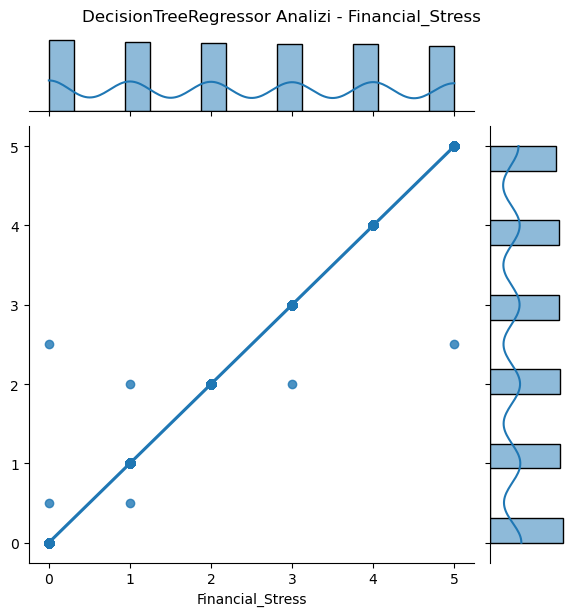

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


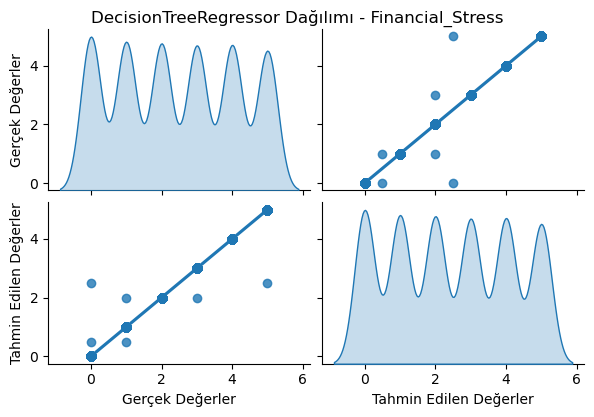


Hedef Değişken: Financial_Stress
R-Kare Skoru: 0.9992659869305729
MAE: 0.0011436740528949249
MSE: 0.002144388849177984


In [28]:
from sklearn.tree import DecisionTreeRegressor
X = dataFrame[xData]
#for yCol in yData :

# yData zeroth index
model = DecisionTreeRegressor()
model.fit(X,dataFrame[yData[0]])
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.jointplot(x=dataFrame[yData[0]], y=y_pred, kind='reg')
plt.suptitle(f'DecisionTreeRegressor Analizi - {yData[0]}', y=1.02)
plt.show()  
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[0]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'DecisionTreeRegressor Dağılımı - {yData[0]}', y=1.02)
plt.show()
# Performans metriklerini hesaplama
DecisionTreeRegressor_r2_zeroth = r2_score(dataFrame[yData[0]], y_pred)
DecisionTreeRegressor_mae_zeroth = mean_absolute_error(dataFrame[yData[0]], y_pred)
DecisionTreeRegressor_mse_zeroth = mean_squared_error(dataFrame[yData[0]], y_pred)
# Sonuçları ekrana yazdırma
print(f"\nHedef Değişken: {yData[0]}")
print(f'R-Kare Skoru: {DecisionTreeRegressor_r2_zeroth}')
print(f'MAE: {DecisionTreeRegressor_mae_zeroth}')
print(f'MSE: {DecisionTreeRegressor_mse_zeroth}')


# yData first index
model = DecisionTreeRegressor()
model.fit(X,dataFrame[yData[1]])
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.jointplot(x=dataFrame[yData[1]], y=y_pred, kind='reg')
plt.suptitle(f'DecisionTreeRegressor Analizi - {yData[1]}', y=1.02)
plt.show()  
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[1]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'DecisionTreeRegressor Dağılımı - {yData[1]}', y=1.02)
plt.show()
# Performans metriklerini hesaplama
DecisionTreeRegressor_r2_first = r2_score(dataFrame[yData[1]], y_pred)
DecisionTreeRegressor_mae_first = mean_absolute_error(dataFrame[yData[1]], y_pred)
DecisionTreeRegressor_mse_first = mean_squared_error(dataFrame[yData[1]], y_pred)
# Sonuçları ekrana yazdırma
print(f"\nHedef Değişken: {yData[1]}")
print(f'R-Kare Skoru: {DecisionTreeRegressor_r2_first}')
print(f'MAE: {DecisionTreeRegressor_mae_first}')
print(f'MSE: {DecisionTreeRegressor_mse_first}')


# yData second index
model = DecisionTreeRegressor()
model.fit(X,dataFrame[yData[2]])
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.jointplot(x=dataFrame[yData[2]], y=y_pred, kind='reg')
plt.suptitle(f'DecisionTreeRegressor Analizi - {yData[2]}', y=1.02)
plt.show()  
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[2]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'DecisionTreeRegressor Dağılımı - {yData[2]}', y=1.02)
plt.show()
# Performans metriklerini hesaplama
DecisionTreeRegressor_r2_second = r2_score(dataFrame[yData[2]], y_pred)
DecisionTreeRegressor_mae_second = mean_absolute_error(dataFrame[yData[2]], y_pred)
DecisionTreeRegressor_mse_second = mean_squared_error(dataFrame[yData[2]], y_pred)
# Sonuçları ekrana yazdırma
print(f"\nHedef Değişken: {yData[2]}")
print(f'R-Kare Skoru: {DecisionTreeRegressor_r2_second}')
print(f'MAE: {DecisionTreeRegressor_mae_second}')
print(f'MSE: {DecisionTreeRegressor_mse_second}')


# yData thrid index
model = DecisionTreeRegressor()
model.fit(X,dataFrame[yData[3]])
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.jointplot(x=dataFrame[yData[3]], y=y_pred, kind='reg')
plt.suptitle(f'DecisionTreeRegressor Analizi - {yData[3]}', y=1.02)
plt.show()  
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[3]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'DecisionTreeRegressor Dağılımı - {yData[3]}', y=1.02)
plt.show()
# Performans metriklerini hesaplama
DecisionTreeRegressor_r2_third = r2_score(dataFrame[yData[3]], y_pred)
DecisionTreeRegressor_mae_third = mean_absolute_error(dataFrame[yData[3]], y_pred)
DecisionTreeRegressor_mse_third = mean_squared_error(dataFrame[yData[3]], y_pred)
# Sonuçları ekrana yazdırma
print(f"\nHedef Değişken: {yData[3]}")
print(f'R-Kare Skoru: {DecisionTreeRegressor_r2_third}')
print(f'MAE: {DecisionTreeRegressor_mae_third}')
print(f'MSE: {DecisionTreeRegressor_mse_third}')



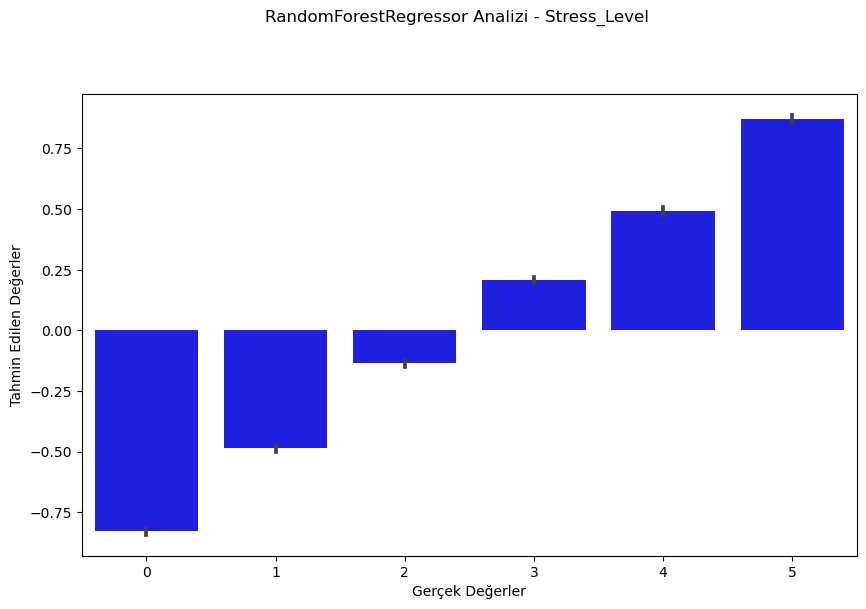

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


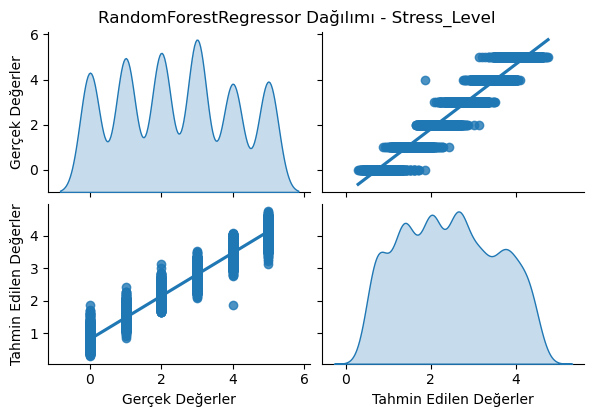


Hedef Değişken: Stress_Level
R-Kare Skoru: 0.8639722385374315
MAE: 0.50201617822254
MSE: 0.3653970801781804


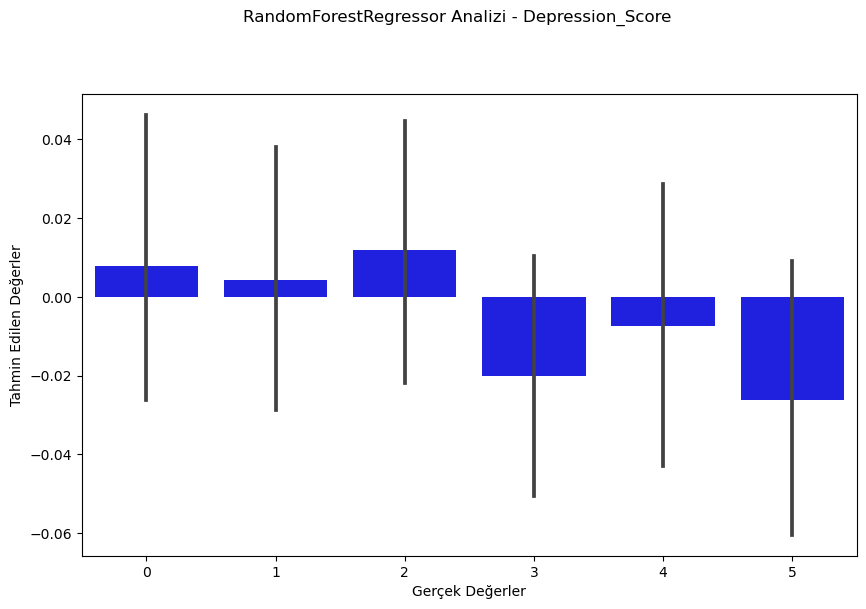

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


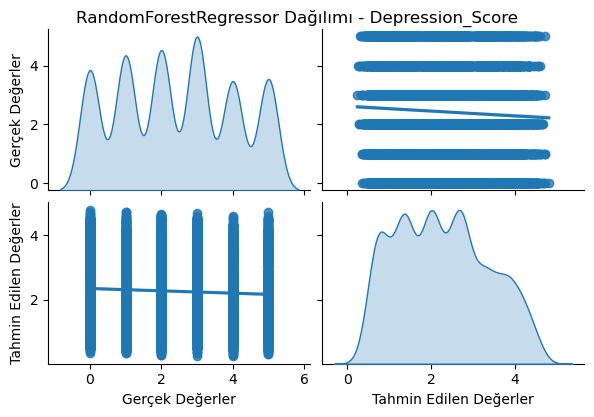


Hedef Değişken: Depression_Score
R-Kare Skoru: 0.8600403539020705
MAE: 0.5056518942101501
MSE: 0.36946744746247323


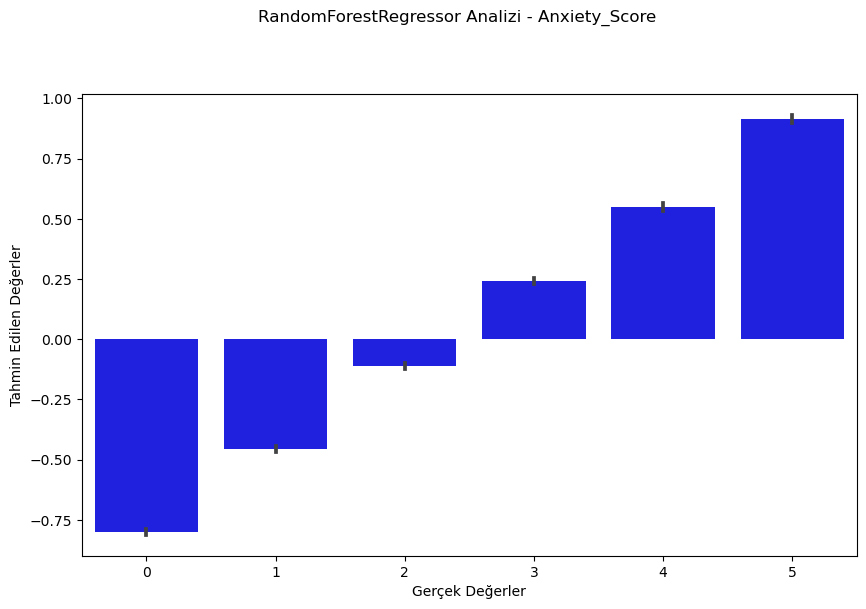

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


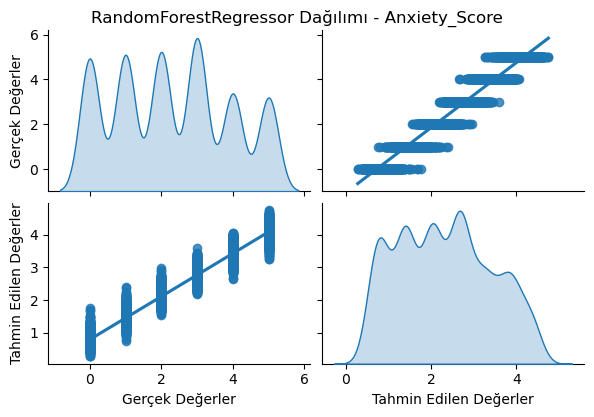


Hedef Değişken: Anxiety_Score
R-Kare Skoru: 0.8634635025600088
MAE: 0.5006291330542224
MSE: 0.36019696472387147


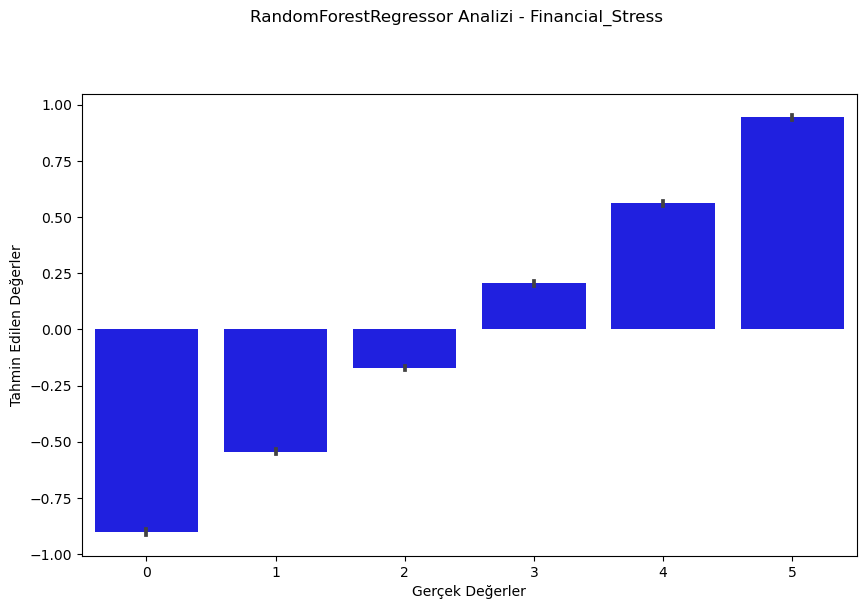

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


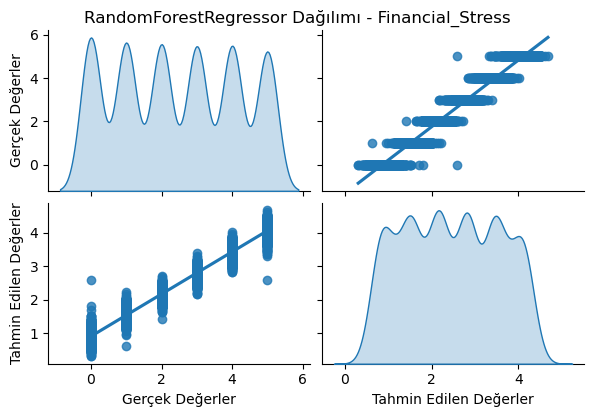


Hedef Değişken: Financial_Stress
R-Kare Skoru: 0.8512718173899513
MAE: 0.5626060042887777
MSE: 0.4345032392902932


In [10]:
from sklearn.ensemble import RandomForestRegressor

X = dataFrame[xData]
#for yCol in yData :


model = RandomForestRegressor(n_estimators=100)
model.fit(X, dataFrame[yData[0]])
y_pred = model.predict(X)
# Grafik oluşturma
residuals = dataFrame[yData[0]] - y_pred
plt.figure(figsize=(10, 6))
sns.barplot(x=dataFrame[yData[0]], y=residuals, color='blue')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.suptitle(f'RandomForestRegressor Analizi - {yData[0]}', y=1.02)
plt.show()
# Performans metriklerini hesaplama
RandomForestRegressor_r2_zeroth = r2_score(dataFrame[yData[0]], y_pred)
RandomForestRegressor_mae_zeroth = mean_absolute_error(dataFrame[yData[0]], y_pred)
RandomForestRegressor_mse_zeroth = mean_squared_error(dataFrame[yData[0]], y_pred)
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[0]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'RandomForestRegressor Dağılımı - {yData[0]}', y=1.02)
plt.show()
# Sonuçları ekrana yazdırma
print(f"\nHedef Değişken: {yData[0]}")
print(f'R-Kare Skoru: {RandomForestRegressor_r2_zeroth}')
print(f'MAE: {RandomForestRegressor_mae_zeroth}')
print(f'MSE: {RandomForestRegressor_mse_zeroth}')


model = RandomForestRegressor(n_estimators=100)
model.fit(X, dataFrame[yData[1]])
y_pred = model.predict(X)
# Grafik oluşturma
residuals = dataFrame[yData[1]] - y_pred
plt.figure(figsize=(10, 6))
sns.barplot(x=dataFrame[yData[0]], y=residuals, color='blue')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.suptitle(f'RandomForestRegressor Analizi - {yData[1]}', y=1.02)
plt.show()
# Performans metriklerini hesaplama
RandomForestRegressor_r2_first = r2_score(dataFrame[yData[1]], y_pred)
RandomForestRegressor_mae_first = mean_absolute_error(dataFrame[yData[1]], y_pred)
RandomForestRegressor_mse_first = mean_squared_error(dataFrame[yData[1]], y_pred)
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[0]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'RandomForestRegressor Dağılımı - {yData[1]}', y=1.02)
plt.show()
# Sonuçları ekrana yazdırma
print(f"\nHedef Değişken: {yData[1]}")
print(f'R-Kare Skoru: {RandomForestRegressor_r2_first}')
print(f'MAE: {RandomForestRegressor_mae_first}')
print(f'MSE: {RandomForestRegressor_mse_first}')



model = RandomForestRegressor(n_estimators=100)
model.fit(X, dataFrame[yData[2]])
y_pred = model.predict(X)
# Grafik oluşturma
residuals = dataFrame[yData[2]] - y_pred
plt.figure(figsize=(10, 6))
sns.barplot(x=dataFrame[yData[2]], y=residuals, color='blue')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.suptitle(f'RandomForestRegressor Analizi - {yData[2]}', y=1.02)
plt.show()
# Performans metriklerini hesaplama
RandomForestRegressor_r2_second = r2_score(dataFrame[yData[2]], y_pred)
RandomForestRegressor_mae_second = mean_absolute_error(dataFrame[yData[2]], y_pred)
RandomForestRegressor_mse_second = mean_squared_error(dataFrame[yData[2]], y_pred)
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[2]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'RandomForestRegressor Dağılımı - {yData[2]}', y=1.02)
plt.show()
# Sonuçları ekrana yazdırma
print(f"\nHedef Değişken: {yData[2]}")
print(f'R-Kare Skoru: {RandomForestRegressor_r2_second}')
print(f'MAE: {RandomForestRegressor_mae_second}')
print(f'MSE: {RandomForestRegressor_mse_second}')



model = RandomForestRegressor(n_estimators=100)
model.fit(X, dataFrame[yData[3]])
y_pred = model.predict(X)
# Grafik oluşturma
residuals = dataFrame[yData[3]] - y_pred
plt.figure(figsize=(10, 6))
sns.barplot(x=dataFrame[yData[3]], y=residuals, color='blue')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.suptitle(f'RandomForestRegressor Analizi - {yData[3]}', y=1.02)
plt.show()
# Performans metriklerini hesaplama
RandomForestRegressor_r2_third = r2_score(dataFrame[yData[3]], y_pred)
RandomForestRegressor_mae_third = mean_absolute_error(dataFrame[yData[3]], y_pred)
RandomForestRegressor_mse_third = mean_squared_error(dataFrame[yData[3]], y_pred)
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[3]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'RandomForestRegressor Dağılımı - {yData[3]}', y=1.02)
plt.show()
# Sonuçları ekrana yazdırma
print(f"\nHedef Değişken: {yData[3]}")
print(f'R-Kare Skoru: {RandomForestRegressor_r2_third}')
print(f'MAE: {RandomForestRegressor_mae_third}')
print(f'MSE: {RandomForestRegressor_mse_third}')



Hedef Değişken: Stress_Level
R-Kare Skoru: 0.3301614238314302
MAE: 1.1009768882535145
MSE: 1.7993169724406322


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


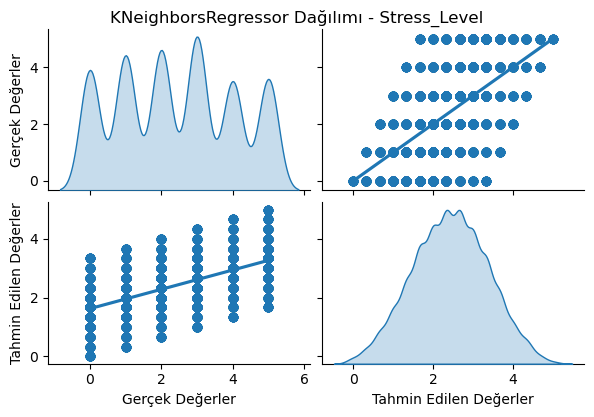


Hedef Değişken: Depression_Score
R-Kare Skoru: 0.3380748956514267
MAE: 1.0863473909935668
MSE: 1.7473592248431418


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


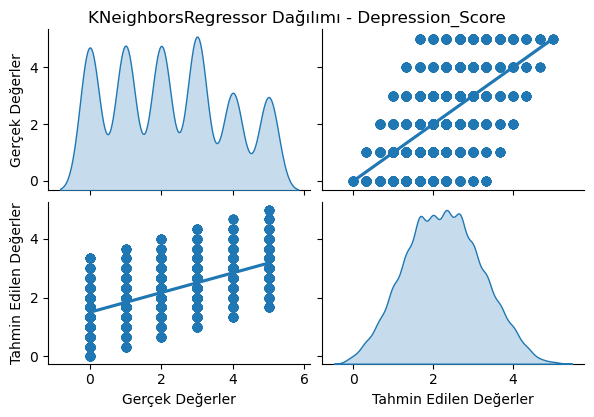


Hedef Değişken: Anxiety_Score
R-Kare Skoru: 0.35166207343033895
MAE: 1.0679532999761736
MSE: 1.710380430466206


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


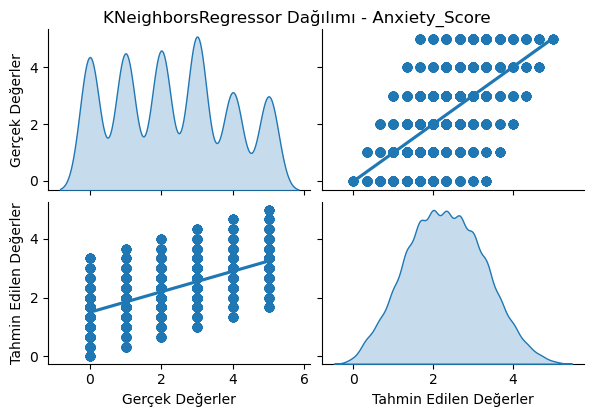


Hedef Değişken: Financial_Stress
R-Kare Skoru: 0.3394861059248472
MAE: 1.1423397664998807
MSE: 1.929664045746962


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


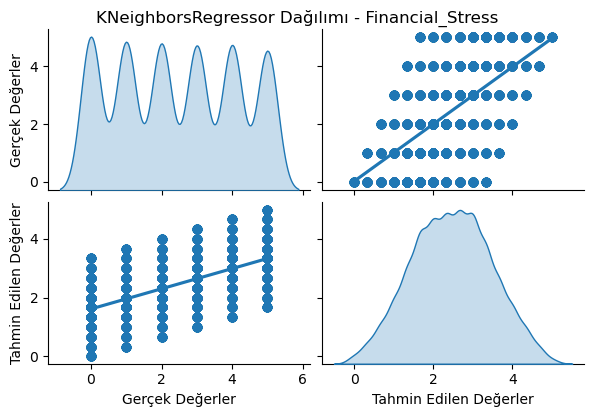

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = KNeighborsRegressor(n_neighbors=3)
X = dataFrame[xData]
#for yCol in yData :
# Modeli eğitme
model.fit(X, dataFrame[yData[0]])
# Tahmin yapma
y_pred = model.predict(X)
# Performans metriklerini hesaplama
KNeighborsRegressor_r2_zeroth = r2_score(dataFrame[yData[0]], y_pred)
KNeighborsRegressor_mae_zeroth = mean_absolute_error(dataFrame[yData[0]], y_pred)
KNeighborsRegressor_mse_zeroth = mean_squared_error(dataFrame[yData[0]], y_pred)
# Sonuçları ayrı ayrı yazdırma
print(f"\nHedef Değişken: {yData[0]}")
print(f'R-Kare Skoru: {KNeighborsRegressor_r2_zeroth}')
print(f'MAE: {KNeighborsRegressor_mae_zeroth}')
print(f'MSE: {KNeighborsRegressor_mse_zeroth}')
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[0]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'KNeighborsRegressor Dağılımı - {yData[0]}', y=1.02)
plt.show()



model = KNeighborsRegressor(n_neighbors=3)
X = dataFrame[xData]
#for yCol in yData :
# Modeli eğitme
model.fit(X, dataFrame[yData[1]])
# Tahmin yapma
y_pred = model.predict(X)
# Performans metriklerini hesaplama
KNeighborsRegressor_r2_first = r2_score(dataFrame[yData[1]], y_pred)
KNeighborsRegressor_mae_first = mean_absolute_error(dataFrame[yData[1]], y_pred)
KNeighborsRegressor_mse_first = mean_squared_error(dataFrame[yData[1]], y_pred)
# Sonuçları ayrı ayrı yazdırma
print(f"\nHedef Değişken: {yData[1]}")
print(f'R-Kare Skoru: {KNeighborsRegressor_r2_first}')
print(f'MAE: {KNeighborsRegressor_mae_first}')
print(f'MSE: {KNeighborsRegressor_mse_first}')
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[1]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'KNeighborsRegressor Dağılımı - {yData[1]}', y=1.02)
plt.show()




model = KNeighborsRegressor(n_neighbors=3)
X = dataFrame[xData]
#for yCol in yData :
# Modeli eğitme
model.fit(X, dataFrame[yData[2]])
# Tahmin yapma
y_pred = model.predict(X)
# Performans metriklerini hesaplama
KNeighborsRegressor_r2_second= r2_score(dataFrame[yData[2]], y_pred)
KNeighborsRegressor_mae_second = mean_absolute_error(dataFrame[yData[2]], y_pred)
KNeighborsRegressor_mse_second = mean_squared_error(dataFrame[yData[2]], y_pred)
# Sonuçları ayrı ayrı yazdırma
print(f"\nHedef Değişken: {yData[2]}")
print(f'R-Kare Skoru: {KNeighborsRegressor_r2_second}')
print(f'MAE: {KNeighborsRegressor_mae_second}')
print(f'MSE: {KNeighborsRegressor_mse_second}')
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[2]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'KNeighborsRegressor Dağılımı - {yData[2]}', y=1.02)
plt.show()





model = KNeighborsRegressor(n_neighbors=3)
X = dataFrame[xData]
#for yCol in yData :
# Modeli eğitme
model.fit(X, dataFrame[yData[3]])
# Tahmin yapma
y_pred = model.predict(X)
# Performans metriklerini hesaplama
KNeighborsRegressor_r2_third = r2_score(dataFrame[yData[3]], y_pred)
KNeighborsRegressor_mae_third = mean_absolute_error(dataFrame[yData[3]], y_pred)
KNeighborsRegressor_mse_third = mean_squared_error(dataFrame[yData[3]], y_pred)
# Sonuçları ayrı ayrı yazdırma
print(f"\nHedef Değişken: {yData[3]}")
print(f'R-Kare Skoru: {KNeighborsRegressor_r2_third}')
print(f'MAE: {KNeighborsRegressor_mae_third}')
print(f'MSE: {KNeighborsRegressor_mse_third}')
# Grafik oluştur
results_df = pd.DataFrame({'Gerçek Değerler': dataFrame[yData[3]], 'Tahmin Edilen Değerler': y_pred})
sns.pairplot(results_df, height=2, aspect=1.5, kind="reg", diag_kind="kde")
plt.suptitle(f'KNeighborsRegressor Dağılımı - {yData[3]}', y=1.02)
plt.show()


KNN Model Doğruluğu: 0.17941386704789136
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.17      0.23      0.19       208
           1       0.19      0.21      0.20       261
           2       0.16      0.17      0.16       248
           3       0.23      0.26      0.24       284
           4       0.15      0.09      0.11       195
           5       0.13      0.06      0.09       203

    accuracy                           0.18      1399
   macro avg       0.17      0.17      0.17      1399
weighted avg       0.17      0.18      0.17      1399



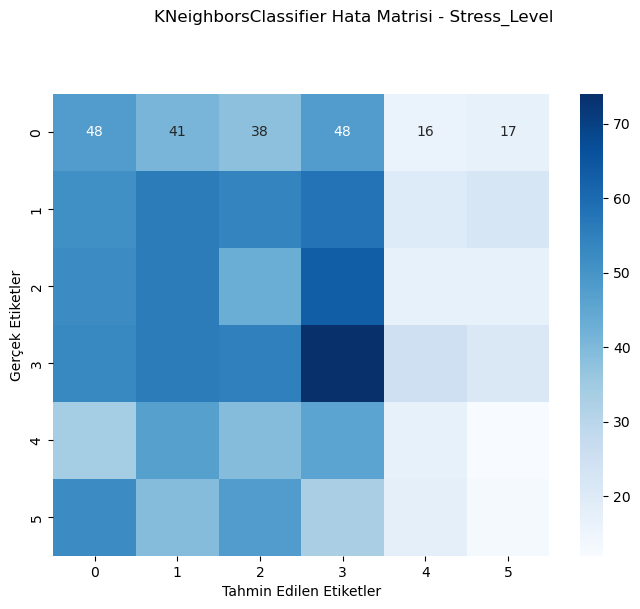

KNN Model Doğruluğu: 0.1887062187276626
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.18      0.24      0.20       259
           1       0.18      0.21      0.19       278
           2       0.21      0.25      0.23       266
           3       0.21      0.25      0.23       261
           4       0.10      0.03      0.05       171
           5       0.14      0.05      0.07       164

    accuracy                           0.19      1399
   macro avg       0.17      0.17      0.16      1399
weighted avg       0.18      0.19      0.18      1399



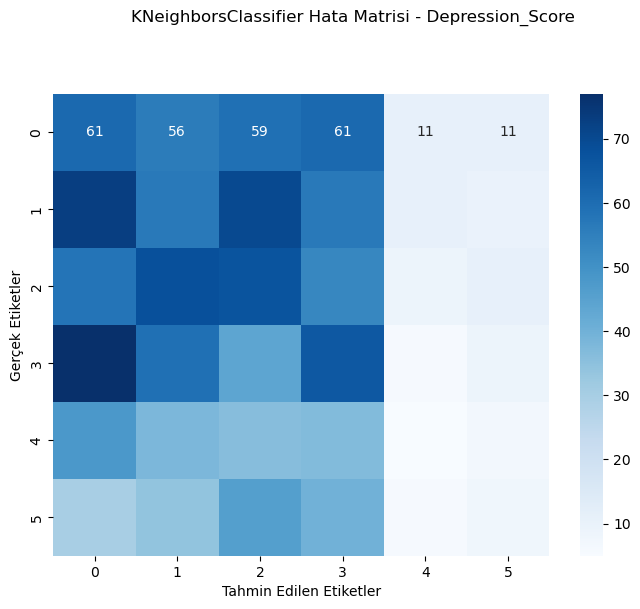

KNN Model Doğruluğu: 0.19299499642601858
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.16      0.20      0.18       243
           1       0.20      0.25      0.22       257
           2       0.19      0.24      0.21       241
           3       0.24      0.29      0.26       296
           4       0.12      0.04      0.06       187
           5       0.14      0.04      0.06       175

    accuracy                           0.19      1399
   macro avg       0.17      0.18      0.17      1399
weighted avg       0.18      0.19      0.18      1399



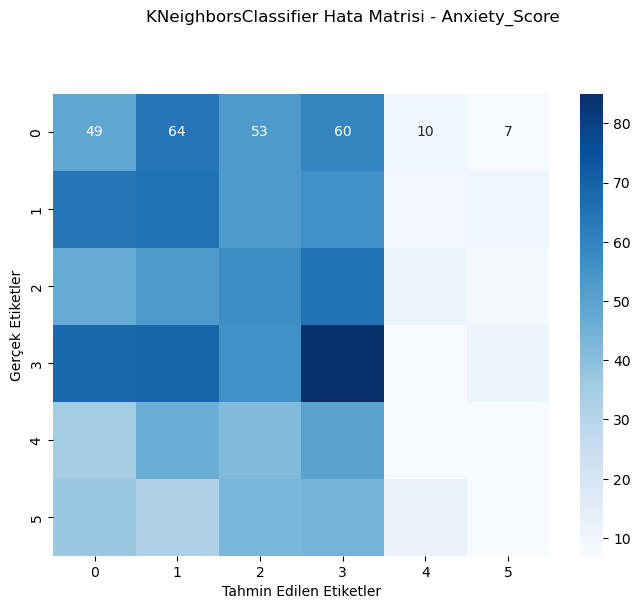

KNN Model Doğruluğu: 0.1579699785561115
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.17      0.26      0.21       254
           1       0.13      0.16      0.14       218
           2       0.20      0.19      0.20       241
           3       0.12      0.12      0.12       204
           4       0.15      0.10      0.12       247
           5       0.16      0.11      0.13       235

    accuracy                           0.16      1399
   macro avg       0.16      0.16      0.15      1399
weighted avg       0.16      0.16      0.15      1399



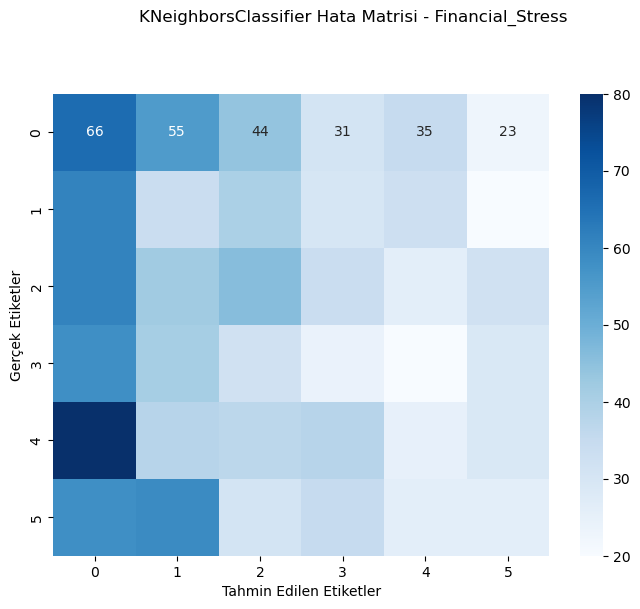

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#for yCol in yData :
X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[0]], test_size=0.2, random_state=42)
# KNN modelini oluşturun ve eğitin
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
# Tahminleri yapın
y_pred = knn_model.predict(X_test)
# Model doğruluğunu değerlendirin
KNeighborsClassifier_accuracy_zeroth = accuracy_score(y_test, y_pred)
print(f"KNN Model Doğruluğu: {KNeighborsClassifier_accuracy_zeroth}")
# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'KNeighborsClassifier Hata Matrisi - {yData[0]}', y=1.02)
plt.show()




X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[1]], test_size=0.2, random_state=42)
# KNN modelini oluşturun ve eğitin
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
# Tahminleri yapın
y_pred = knn_model.predict(X_test)
# Model doğruluğunu değerlendirin
KNeighborsClassifier_accuracy_first = accuracy_score(y_test, y_pred)
print(f"KNN Model Doğruluğu: {KNeighborsClassifier_accuracy_first}")
# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'KNeighborsClassifier Hata Matrisi - {yData[1]}', y=1.02)
plt.show()





X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[2]], test_size=0.2, random_state=42)
# KNN modelini oluşturun ve eğitin
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
# Tahminleri yapın
y_pred = knn_model.predict(X_test)
# Model doğruluğunu değerlendirin
KNeighborsClassifier_accuracy_second = accuracy_score(y_test, y_pred)
print(f"KNN Model Doğruluğu: {KNeighborsClassifier_accuracy_second}")
# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'KNeighborsClassifier Hata Matrisi - {yData[2]}', y=1.02)
plt.show()





X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[3]], test_size=0.2, random_state=42)
# KNN modelini oluşturun ve eğitin
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
# Tahminleri yapın
y_pred = knn_model.predict(X_test)
# Model doğruluğunu değerlendirin
KNeighborsClassifier_accuracy_third = accuracy_score(y_test, y_pred)
print(f"KNN Model Doğruluğu: {KNeighborsClassifier_accuracy_third}")
# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'KNeighborsClassifier Hata Matrisi - {yData[3]}', y=1.02)
plt.show()

Doğruluk (Stress_Level): 0.18467695826186392
Sınıflandırma Raporu (Stress_Level):
               precision    recall  f1-score   support

           0       0.15      0.04      0.07       267
           1       0.21      0.22      0.21       322
           2       0.18      0.28      0.22       314
           3       0.20      0.32      0.24       352
           4       0.15      0.10      0.12       241
           5       0.14      0.07      0.10       253

    accuracy                           0.18      1749
   macro avg       0.17      0.17      0.16      1749
weighted avg       0.18      0.18      0.17      1749



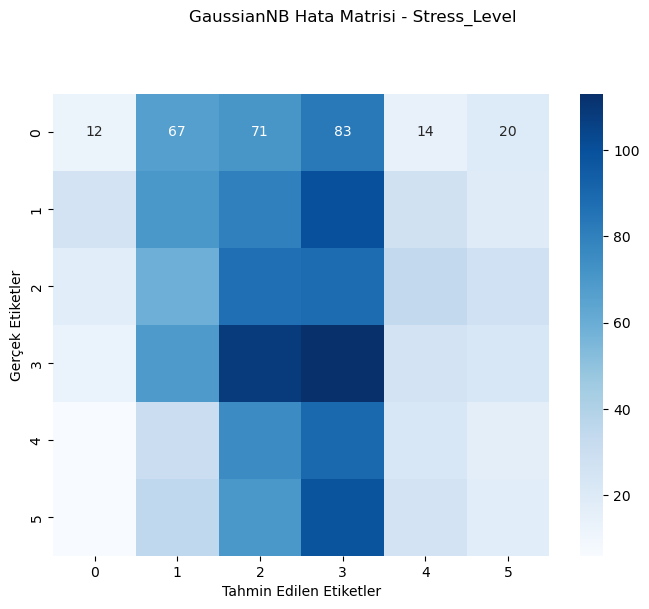

Doğruluk (Depression_Score): 0.19096626643796455
Sınıflandırma Raporu (Depression_Score):
               precision    recall  f1-score   support

           0       0.19      0.12      0.15       328
           1       0.24      0.10      0.14       346
           2       0.19      0.41      0.26       325
           3       0.19      0.37      0.25       329
           4       0.00      0.00      0.00       225
           5       0.16      0.03      0.04       196

    accuracy                           0.19      1749
   macro avg       0.16      0.17      0.14      1749
weighted avg       0.17      0.19      0.15      1749



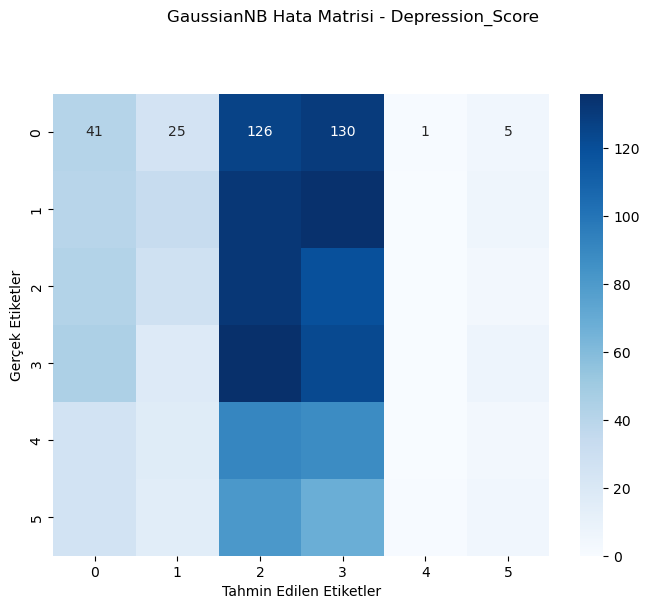

Doğruluk (Anxiety_Score): 0.19954259576901087
Sınıflandırma Raporu (Anxiety_Score):
               precision    recall  f1-score   support

           0       0.20      0.18      0.19       302
           1       0.20      0.26      0.23       314
           2       0.21      0.24      0.23       317
           3       0.19      0.18      0.19       368
           4       0.18      0.23      0.20       241
           5       0.32      0.06      0.10       207

    accuracy                           0.20      1749
   macro avg       0.22      0.19      0.19      1749
weighted avg       0.21      0.20      0.19      1749



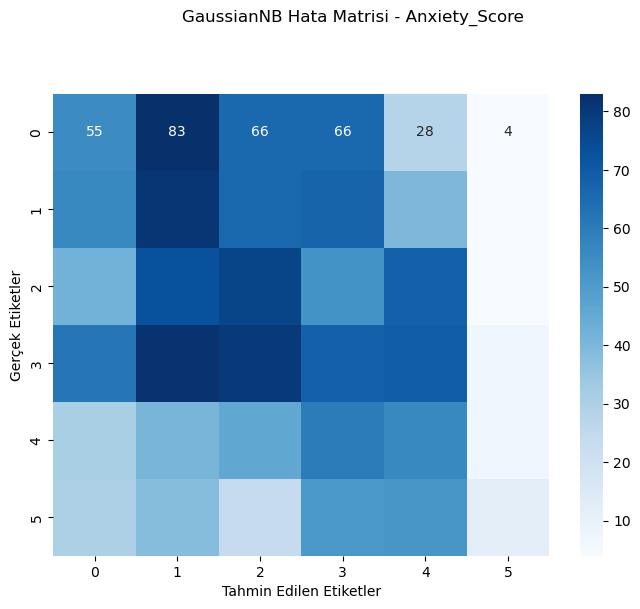

Doğruluk (Financial_Stress): 0.16123499142367068
Sınıflandırma Raporu (Financial_Stress):
               precision    recall  f1-score   support

           0       0.15      0.08      0.11       312
           1       0.14      0.03      0.04       271
           2       0.15      0.05      0.08       312
           3       0.17      0.15      0.16       272
           4       0.20      0.06      0.09       295
           5       0.16      0.61      0.25       287

    accuracy                           0.16      1749
   macro avg       0.16      0.16      0.12      1749
weighted avg       0.16      0.16      0.12      1749



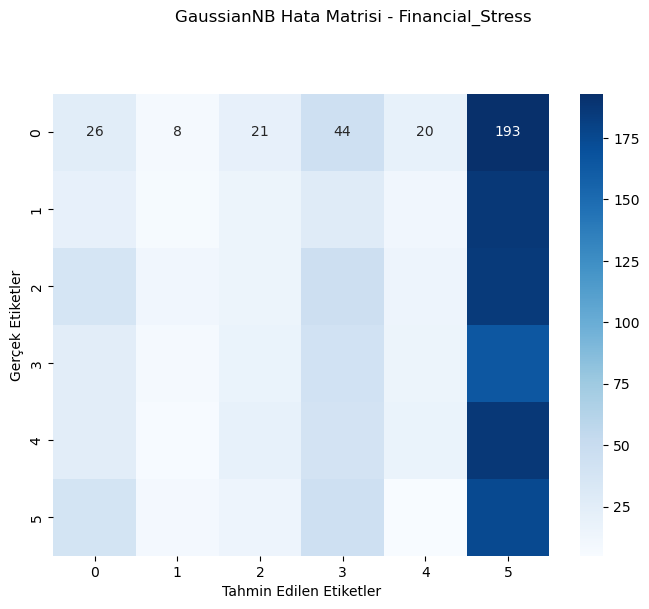

In [13]:
from sklearn.naive_bayes import GaussianNB

#for yCol in yData :
X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[0]], test_size=0.25, random_state=42)
# Naive Bayes modeli oluşturma ve eğitme
model = GaussianNB()
model.fit(X_train, y_train)
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)
# Doğruluk (accuracy) değerini hesaplama
GaussianNB_accuracy_zeroth = accuracy_score(y_test, y_pred)
print(f"Doğruluk ({yData[0]}): {GaussianNB_accuracy_zeroth}")
# Sınıflandırma raporu
print(f"Sınıflandırma Raporu ({yData[0]}):\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'GaussianNB Hata Matrisi - {yData[0]}', y=1.02)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[1]], test_size=0.25, random_state=42)
# Naive Bayes modeli oluşturma ve eğitme
model = GaussianNB()
model.fit(X_train, y_train)
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)
# Doğruluk (accuracy) değerini hesaplama
GaussianNB_accuracy_first = accuracy_score(y_test, y_pred)
print(f"Doğruluk ({yData[1]}): {GaussianNB_accuracy_first}")
# Sınıflandırma raporu
print(f"Sınıflandırma Raporu ({yData[1]}):\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'GaussianNB Hata Matrisi - {yData[1]}', y=1.02)
plt.show()





X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[2]], test_size=0.25, random_state=42)
# Naive Bayes modeli oluşturma ve eğitme
model = GaussianNB()
model.fit(X_train, y_train)
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)
# Doğruluk (accuracy) değerini hesaplama
GaussianNB_accuracy_second = accuracy_score(y_test, y_pred)
print(f"Doğruluk ({yData[2]}): {GaussianNB_accuracy_second}")
# Sınıflandırma raporu
print(f"Sınıflandırma Raporu ({yData[2]}):\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'GaussianNB Hata Matrisi - {yData[2]}', y=1.02)
plt.show()



X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[3]], test_size=0.25, random_state=42)
# Naive Bayes modeli oluşturma ve eğitme
model = GaussianNB()
model.fit(X_train, y_train)
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)
# Doğruluk (accuracy) değerini hesaplama
GaussianNB_accuracy_third = accuracy_score(y_test, y_pred)
print(f"Doğruluk ({yData[3]}): {GaussianNB_accuracy_third}")
# Sınıflandırma raporu
print(f"Sınıflandırma Raporu ({yData[3]}):\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'GaussianNB Hata Matrisi - {yData[3]}', y=1.02)
plt.show()

RandomForestClassifier Model Doğruluğu (Stress_Level): 0.2008577555396712
Sınıflandırma Raporu (Stress_Level):
               precision    recall  f1-score   support

           0       0.14      0.16      0.15       208
           1       0.23      0.22      0.23       261
           2       0.18      0.18      0.18       248
           3       0.21      0.26      0.23       284
           4       0.28      0.23      0.25       195
           5       0.19      0.13      0.16       203

    accuracy                           0.20      1399
   macro avg       0.20      0.20      0.20      1399
weighted avg       0.20      0.20      0.20      1399



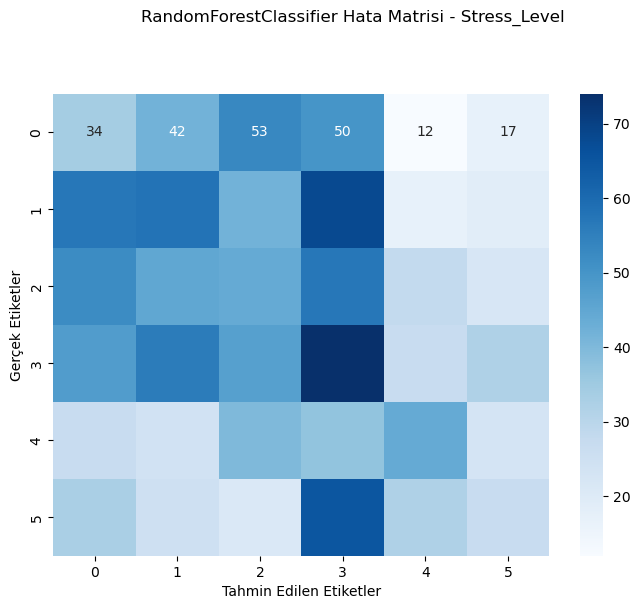

RandomForestClassifier Model Doğruluğu (Depression_Score): 0.1879914224446033
Sınıflandırma Raporu (Depression_Score):
               precision    recall  f1-score   support

           0       0.17      0.19      0.18       259
           1       0.21      0.21      0.21       278
           2       0.18      0.20      0.19       266
           3       0.17      0.22      0.19       261
           4       0.29      0.18      0.22       171
           5       0.17      0.09      0.12       164

    accuracy                           0.19      1399
   macro avg       0.20      0.18      0.18      1399
weighted avg       0.19      0.19      0.19      1399



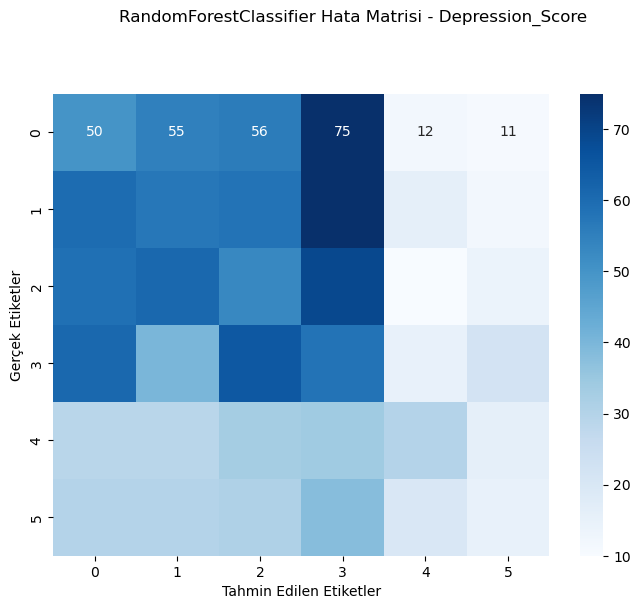

RandomForestClassifier Model Doğruluğu (Anxiety_Score): 0.20228734810578985
Sınıflandırma Raporu (Anxiety_Score):
               precision    recall  f1-score   support

           0       0.22      0.27      0.24       243
           1       0.23      0.25      0.24       257
           2       0.17      0.18      0.17       241
           3       0.20      0.22      0.21       296
           4       0.23      0.14      0.18       187
           5       0.15      0.09      0.11       175

    accuracy                           0.20      1399
   macro avg       0.20      0.19      0.19      1399
weighted avg       0.20      0.20      0.20      1399



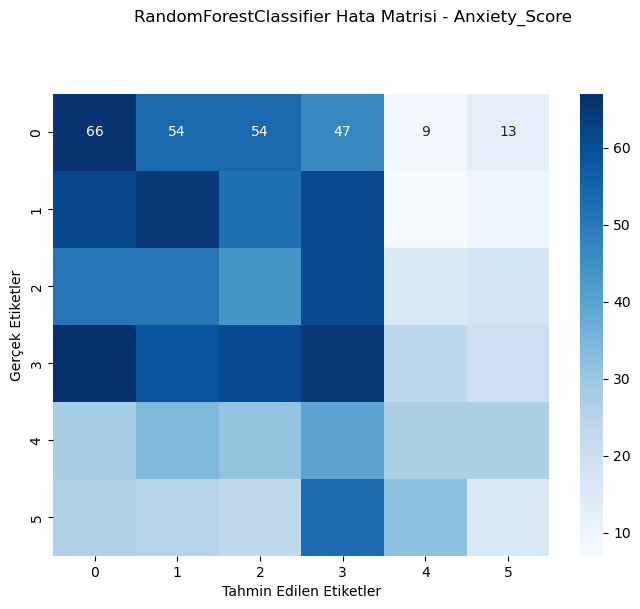

RandomForestClassifier Model Doğruluğu (Financial_Stress): 0.1837026447462473
Sınıflandırma Raporu (Financial_Stress):
               precision    recall  f1-score   support

           0       0.19      0.21      0.20       254
           1       0.18      0.22      0.20       218
           2       0.20      0.18      0.19       241
           3       0.13      0.15      0.14       204
           4       0.22      0.20      0.21       247
           5       0.18      0.14      0.16       235

    accuracy                           0.18      1399
   macro avg       0.18      0.18      0.18      1399
weighted avg       0.19      0.18      0.18      1399



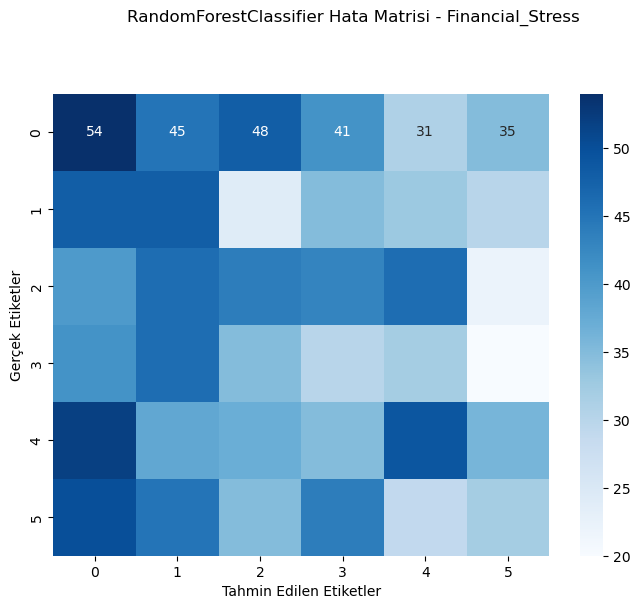

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#for yCol in yData:
X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[0]], test_size=0.2, random_state=42)
# RandomForestClassifier modelini oluşturun ve eğitin
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Tahminleri yapın
y_pred = rf_model.predict(X_test)
# Model doğruluğunu değerlendirin
RandomForestClassifier_accuracy_zeroth = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Model Doğruluğu ({yData[0]}): {RandomForestClassifier_accuracy_zeroth}")
# Sınıflandırma raporu
print(f"Sınıflandırma Raporu ({yData[0]}):\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'RandomForestClassifier Hata Matrisi - {yData[0]}', y=1.02)
plt.show()



X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[1]], test_size=0.2, random_state=42)
# RandomForestClassifier modelini oluşturun ve eğitin
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Tahminleri yapın
y_pred = rf_model.predict(X_test)
# Model doğruluğunu değerlendirin
RandomForestClassifier_accuracy_first = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Model Doğruluğu ({yData[1]}): {RandomForestClassifier_accuracy_first}")
# Sınıflandırma raporu
print(f"Sınıflandırma Raporu ({yData[1]}):\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'RandomForestClassifier Hata Matrisi - {yData[1]}', y=1.02)
plt.show()



X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[2]], test_size=0.2, random_state=42)
# RandomForestClassifier modelini oluşturun ve eğitin
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Tahminleri yapın
y_pred = rf_model.predict(X_test)
# Model doğruluğunu değerlendirin
RandomForestClassifier_accuracy_second = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Model Doğruluğu ({yData[2]}): {RandomForestClassifier_accuracy_second}")
# Sınıflandırma raporu
print(f"Sınıflandırma Raporu ({yData[2]}):\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'RandomForestClassifier Hata Matrisi - {yData[2]}', y=1.02)
plt.show()




X_train, X_test, y_train, y_test = train_test_split(X, dataFrame[yData[3]], test_size=0.2, random_state=42)
# RandomForestClassifier modelini oluşturun ve eğitin
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Tahminleri yapın
y_pred = rf_model.predict(X_test)
# Model doğruluğunu değerlendirin
RandomForestClassifier_accuracy_third = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Model Doğruluğu ({yData[3]}): {RandomForestClassifier_accuracy_third}")
# Sınıflandırma raporu
print(f"Sınıflandırma Raporu ({yData[3]}):\n", classification_report(y_test, y_pred))
# Hata matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.suptitle(f'RandomForestClassifier Hata Matrisi - {yData[3]}', y=1.02)
plt.show()


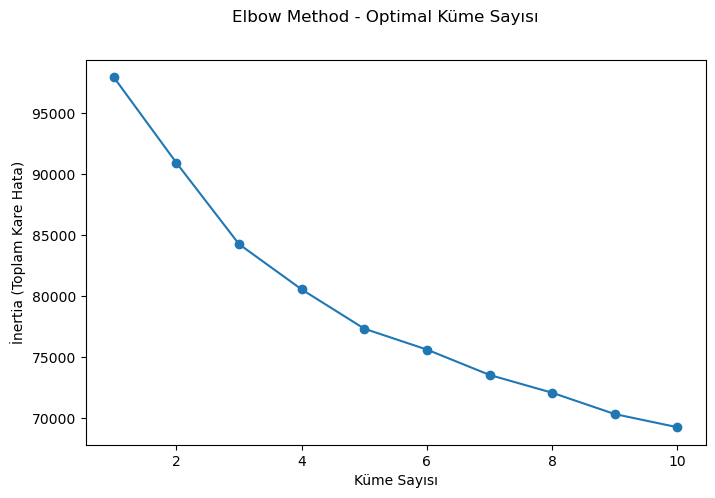

Küme Etiketleri: [2 0 0 ... 0 1 1]
Küme Merkezleri: [[2.29360536e+01 4.46665652e-01 1.00000000e+00 7.06455542e-01
  4.46406821e-01 4.97107186e-01 4.45036541e-01 6.52710110e-01
  2.36906212e-01 2.99634592e-01 3.74700271e-16 4.43209501e-01
  2.20045676e+01 5.94701583e-01]
 [2.28338192e+01 4.44752187e-01 5.10204082e-01 7.15743440e-01
  4.46064140e-01 5.37900875e-01 4.22740525e-01 6.67638484e-01
  2.91545190e-01 2.94460641e-01 1.00000000e+00 4.37317784e-01
  2.19241983e+01 6.15160350e-01]
 [2.30866983e+01 4.47862233e-01 4.60742555e-15 7.04869359e-01
  4.56799287e-01 5.01336105e-01 4.43883610e-01 6.60332542e-01
  2.47179335e-01 3.16508314e-01 3.74700271e-16 4.51157957e-01
  2.20261283e+01 6.02137767e-01]]


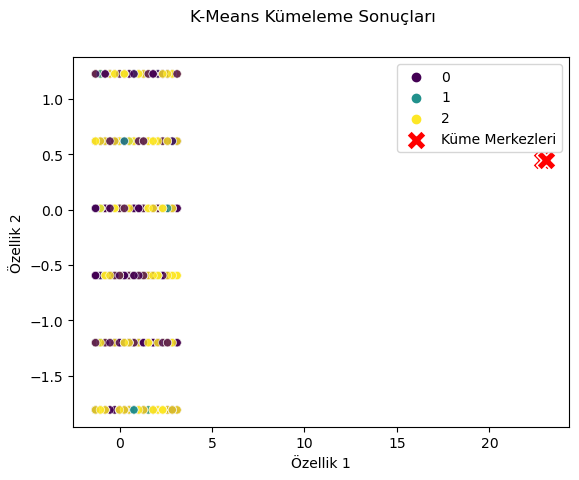

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimal küme sayısını belirleme (elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow method grafiği
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.suptitle('Elbow Method - Optimal Küme Sayısı')
plt.xlabel('Küme Sayısı')
plt.ylabel('İnertia (Toplam Kare Hata)')
plt.show()

# Optimal küme sayısına göre model oluşturma ve eğitme
optimal_k = 3  # Elbow method grafiğine bakarak uygun küme sayısını belirle
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Küme etiketlerini al
KMeans_cluster_labels = kmeans.labels_

# Sonuçları yazdır
print("Küme Etiketleri:", KMeans_cluster_labels)

# Küme merkezlerini inceleme
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Küme Merkezleri:", cluster_centers)

# Veriyi ve küme merkezlerini görselleştirme
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=KMeans_cluster_labels, palette='viridis', alpha=0.8)
sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker='X', s=200, color='red', label='Küme Merkezleri')
plt.suptitle('K-Means Kümeleme Sonuçları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.legend()
plt.show()


C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


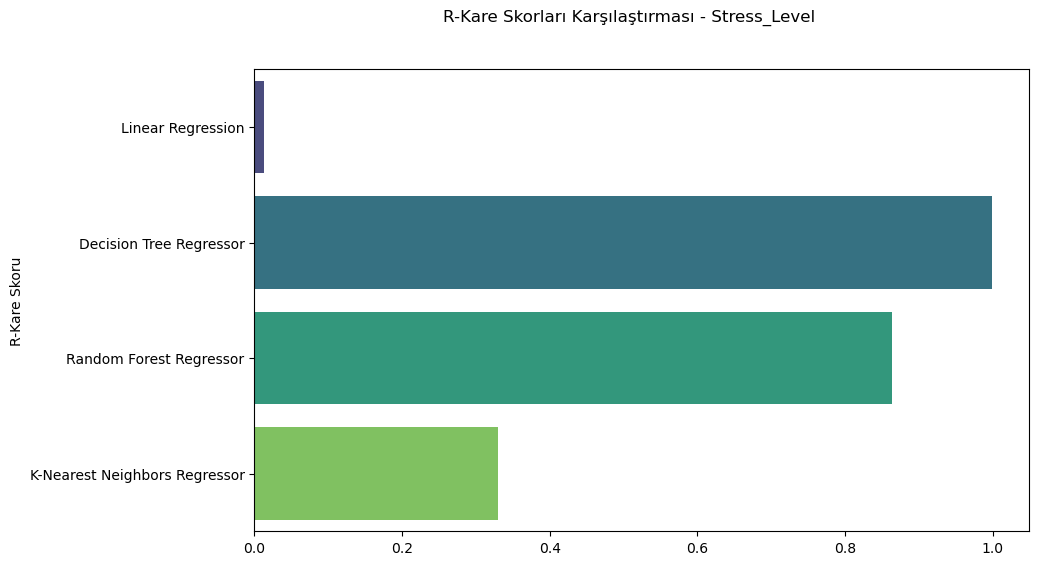

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


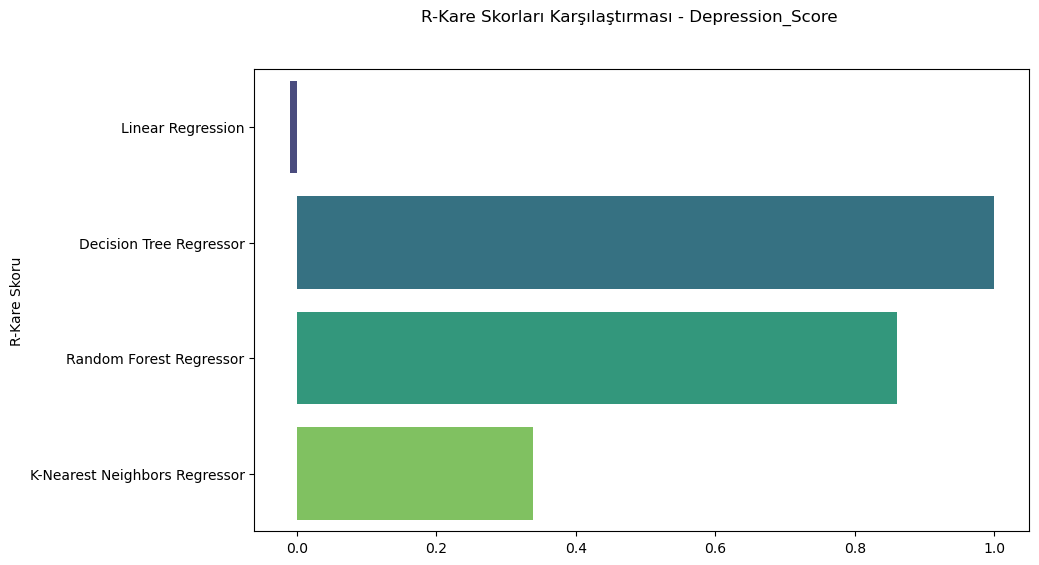

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


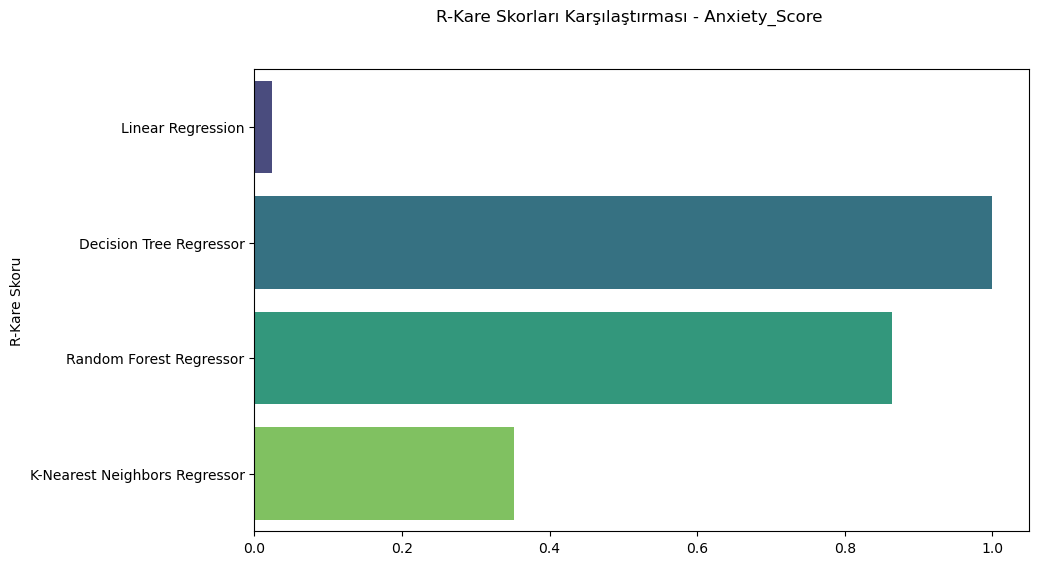

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


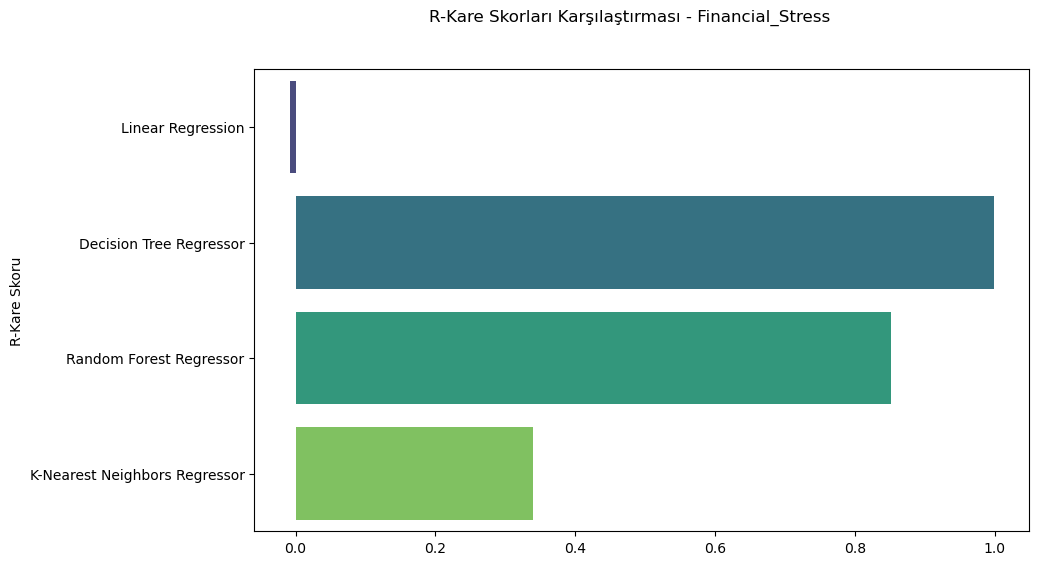

In [25]:
#Model isimleri ve r2 skorları 
model_names_r2 = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'K-Nearest Neighbors Regressor']

r2_scores = [LinearRegression_r2_zeroth, DecisionTreeRegressor_r2_zeroth, RandomForestRegressor_r2_zeroth, KNeighborsRegressor_r2_zeroth]
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_scores, y=model_names_r2, palette='viridis')
plt.suptitle(f'R-Kare Skorları Karşılaştırması - {yData[0]}')
plt.ylabel('R-Kare Skoru')
plt.show()

r2_scores = [LinearRegression_r2_first, DecisionTreeRegressor_r2_first, RandomForestRegressor_r2_first, KNeighborsRegressor_r2_first]
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_scores, y=model_names_r2, palette='viridis')
plt.suptitle(f'R-Kare Skorları Karşılaştırması - {yData[1]}')
plt.ylabel('R-Kare Skoru')
plt.show()

r2_scores = [LinearRegression_r2_second, DecisionTreeRegressor_r2_second, RandomForestRegressor_r2_second, KNeighborsRegressor_r2_second]
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_scores, y=model_names_r2, palette='viridis')
plt.suptitle(f'R-Kare Skorları Karşılaştırması - {yData[2]}')
plt.ylabel('R-Kare Skoru')
plt.show()

r2_scores = [LinearRegression_r2_third, DecisionTreeRegressor_r2_third, RandomForestRegressor_r2_third, KNeighborsRegressor_r2_third]
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_scores, y=model_names_r2, palette='viridis')
plt.suptitle(f'R-Kare Skorları Karşılaştırması - {yData[3]}')
plt.ylabel('R-Kare Skoru')
plt.show()



C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


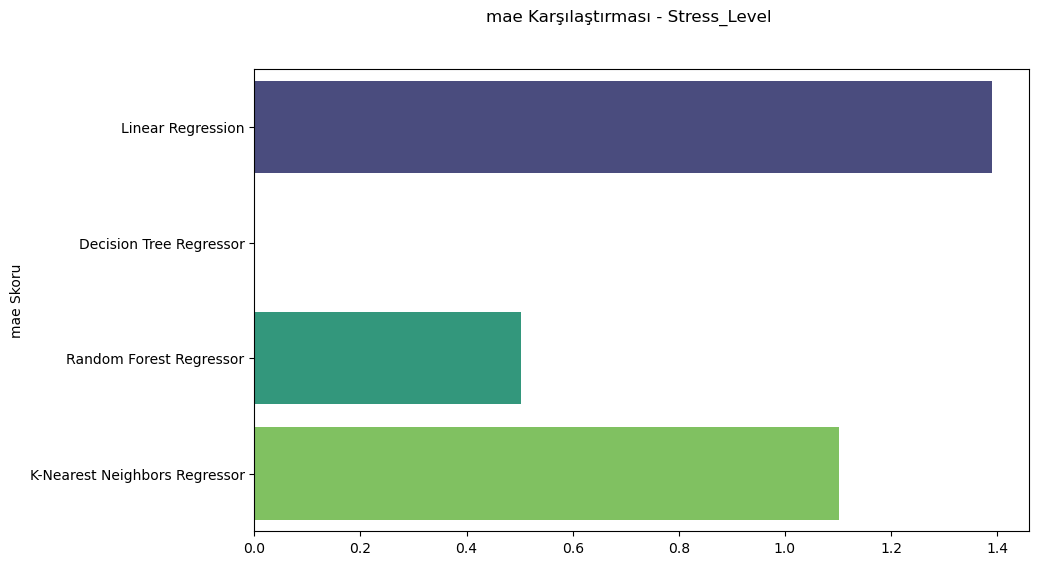

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


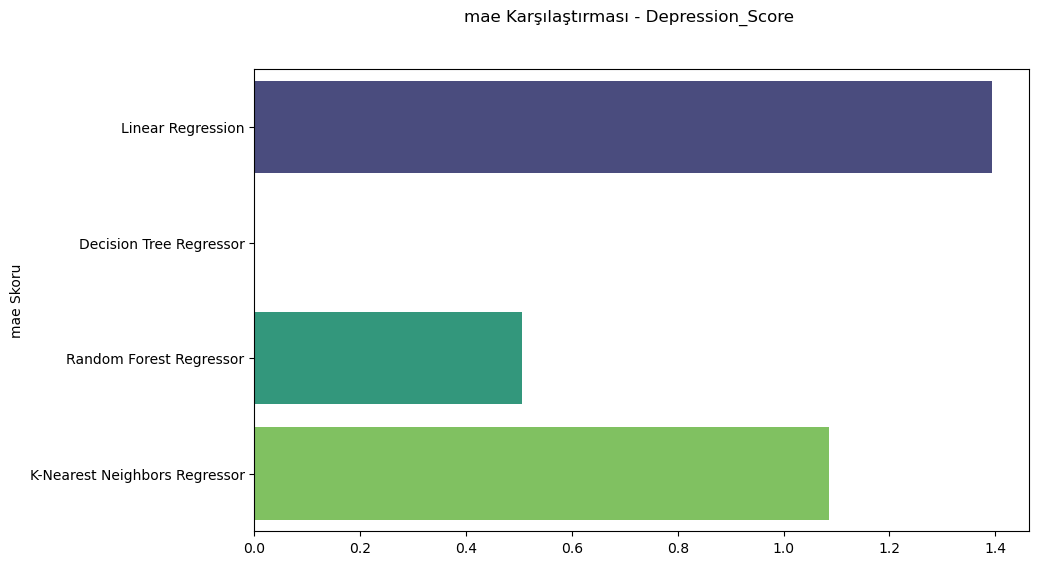

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


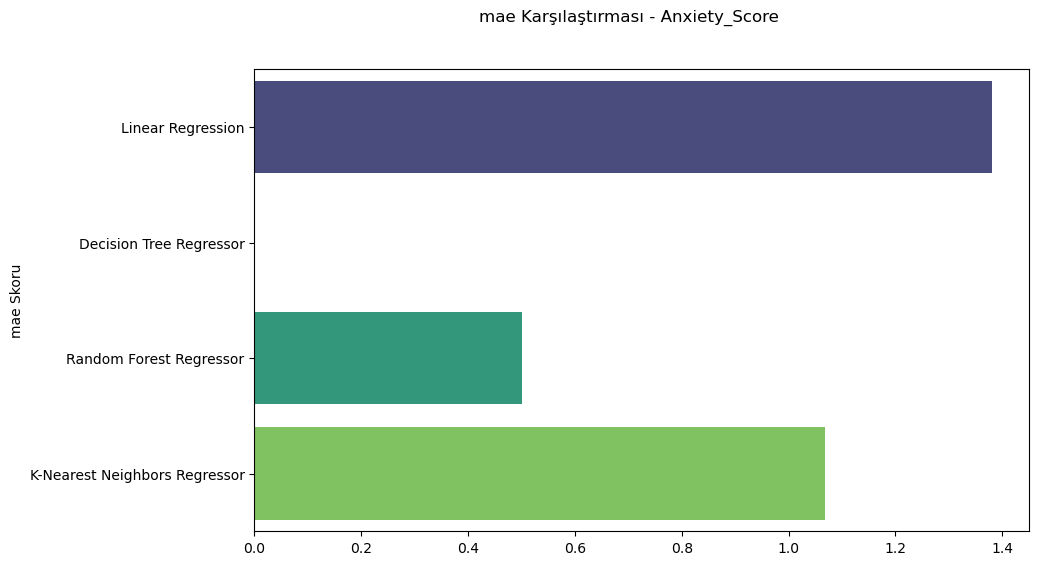

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


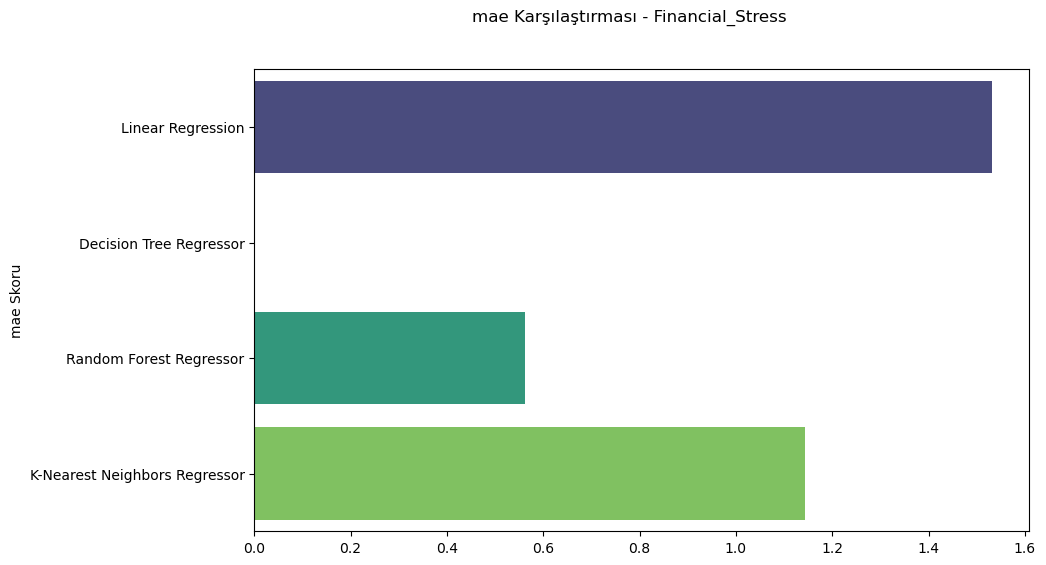

In [27]:
#Model isimleri ve mae skorları 
model_names_mae = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'K-Nearest Neighbors Regressor']


mae_scores = [LinearRegression_mae_zeroth, DecisionTreeRegressor_mae_zeroth, RandomForestRegressor_mae_zeroth, KNeighborsRegressor_mae_zeroth]
plt.figure(figsize=(10, 6))
sns.barplot(x=mae_scores, y=model_names_mae, palette='viridis')
plt.suptitle(f'mae Karşılaştırması - {yData[0]}')
plt.ylabel('mae Skoru')
plt.show()





mae_scores = [LinearRegression_mae_first, DecisionTreeRegressor_mae_first, RandomForestRegressor_mae_first, KNeighborsRegressor_mae_first]
plt.figure(figsize=(10, 6))
sns.barplot(x=mae_scores, y=model_names_mae, palette='viridis')
plt.suptitle(f'mae Karşılaştırması - {yData[1]}')
plt.ylabel('mae Skoru')
plt.show()





mae_scores = [LinearRegression_mae_second, DecisionTreeRegressor_mae_second, RandomForestRegressor_mae_second, KNeighborsRegressor_mae_second]
plt.figure(figsize=(10, 6))
sns.barplot(x=mae_scores, y=model_names_mae, palette='viridis')
plt.suptitle(f'mae Karşılaştırması - {yData[2]}')
plt.ylabel('mae Skoru')
plt.show()





mae_scores = [LinearRegression_mae_third, DecisionTreeRegressor_mae_third, RandomForestRegressor_mae_third, KNeighborsRegressor_mae_third]
plt.figure(figsize=(10, 6))
sns.barplot(x=mae_scores, y=model_names_mae, palette='viridis')
plt.suptitle(f'mae Karşılaştırması - {yData[3]}')
plt.ylabel('mae Skoru')
plt.show()

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


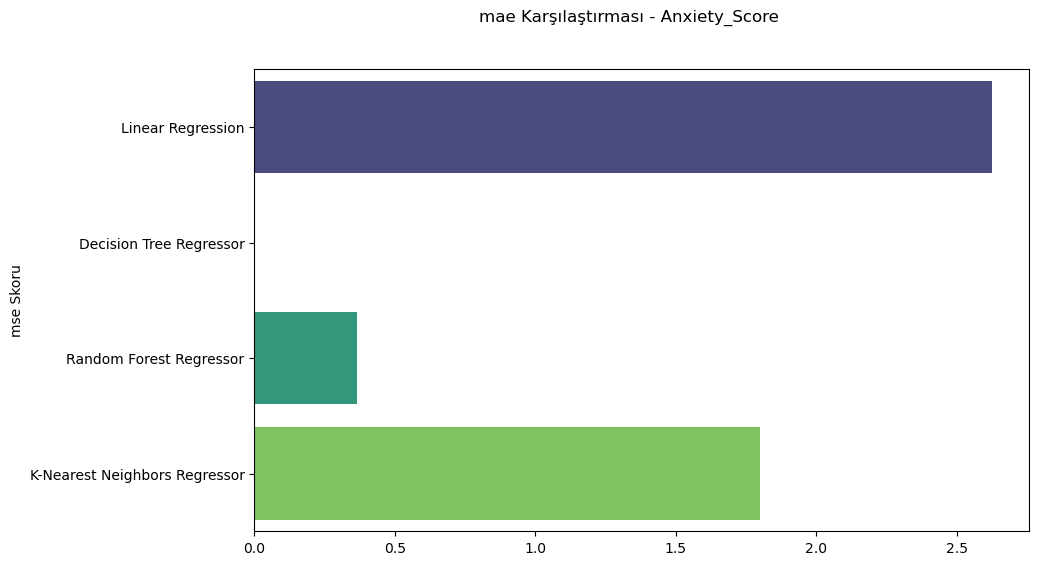

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


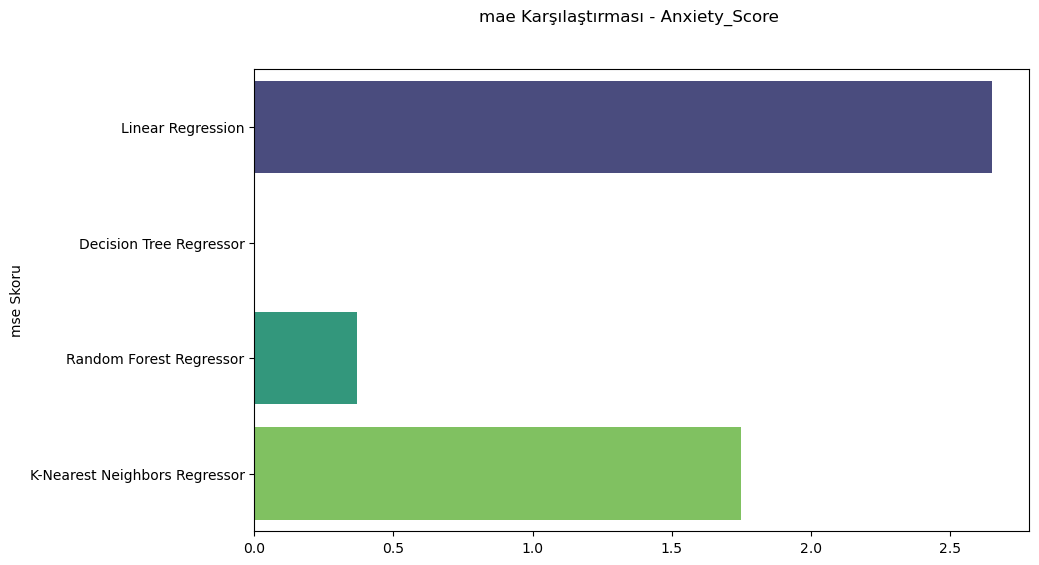

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


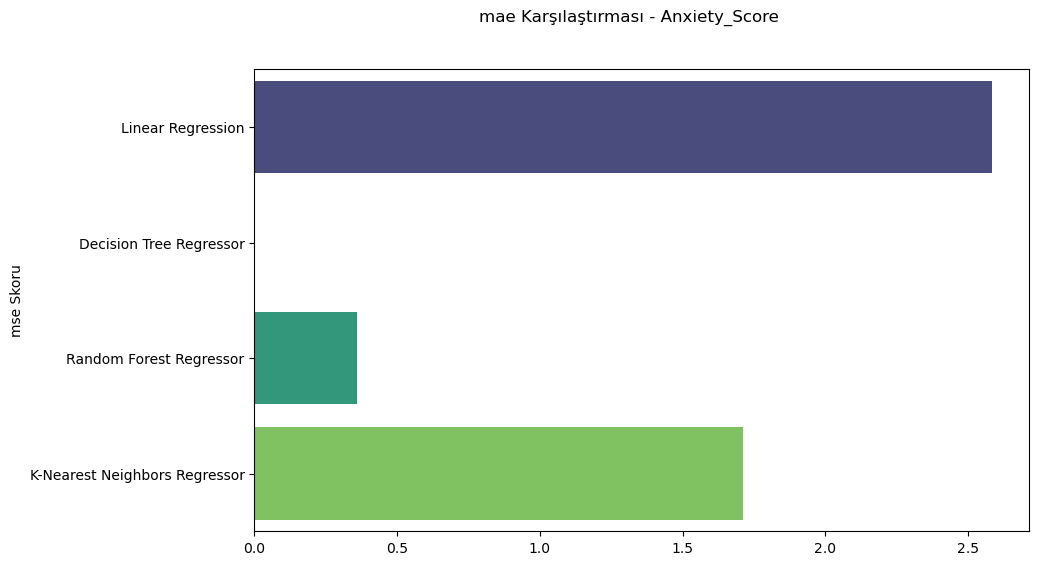

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


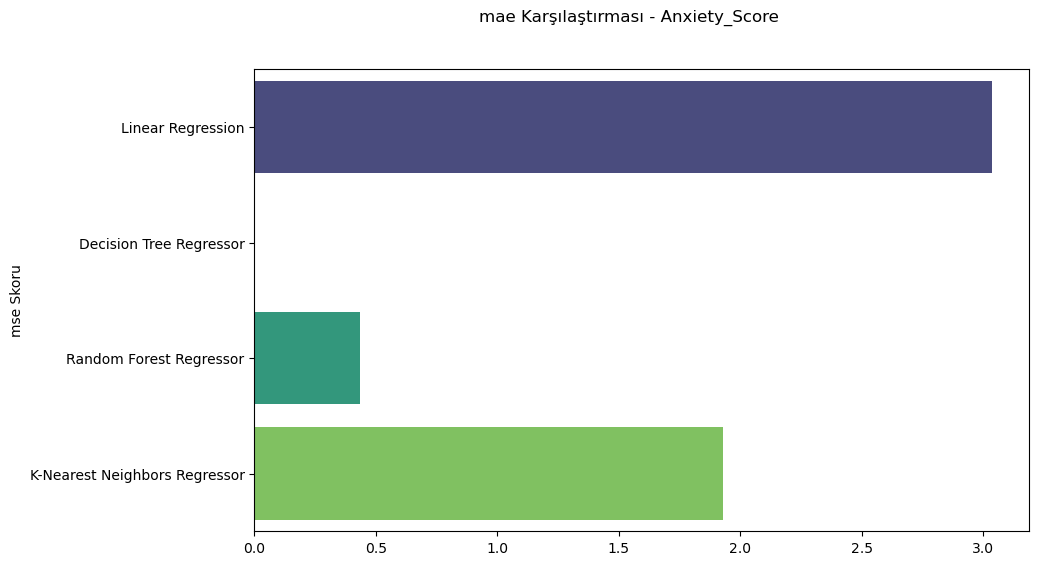

In [36]:
#Model isimleri ve mse skorları 
model_names_mae = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'K-Nearest Neighbors Regressor']


mse_scores = [LinearRegression_mse_zeroth, DecisionTreeRegressor_mse_zeroth, RandomForestRegressor_mse_zeroth, KNeighborsRegressor_mse_zeroth]
plt.figure(figsize=(10, 6))
sns.barplot(x=mse_scores, y=model_names_mae, palette='viridis')
plt.suptitle(f'mae Karşılaştırması - {yData[0]}')
plt.ylabel('mse Skoru')
plt.show()

mse_scores = [LinearRegression_mse_first, DecisionTreeRegressor_mse_first, RandomForestRegressor_mse_first, KNeighborsRegressor_mse_first]
plt.figure(figsize=(10, 6))
sns.barplot(x=mse_scores, y=model_names_mae, palette='viridis')
plt.suptitle(f'mse Karşılaştırması - {yData[1]}')
plt.ylabel('mse Skoru')
plt.show()


mse_scores = [LinearRegression_mse_second, DecisionTreeRegressor_mse_second, RandomForestRegressor_mse_second, KNeighborsRegressor_mse_second]
plt.figure(figsize=(10, 6))
sns.barplot(x=mse_scores, y=model_names_mae, palette='viridis')
plt.suptitle(f'mse Karşılaştırması - {yData[2]}')
plt.ylabel('mse Skoru')
plt.show()





mse_scores = [LinearRegression_mse_third, DecisionTreeRegressor_mse_third, RandomForestRegressor_mse_third, KNeighborsRegressor_mse_third]
plt.figure(figsize=(10, 6))
sns.barplot(x=mse_scores, y=model_names_mae, palette='viridis')
plt.suptitle(f'mse Karşılaştırması - {yData[3]}')
plt.ylabel('mse Skoru')
plt.show()

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


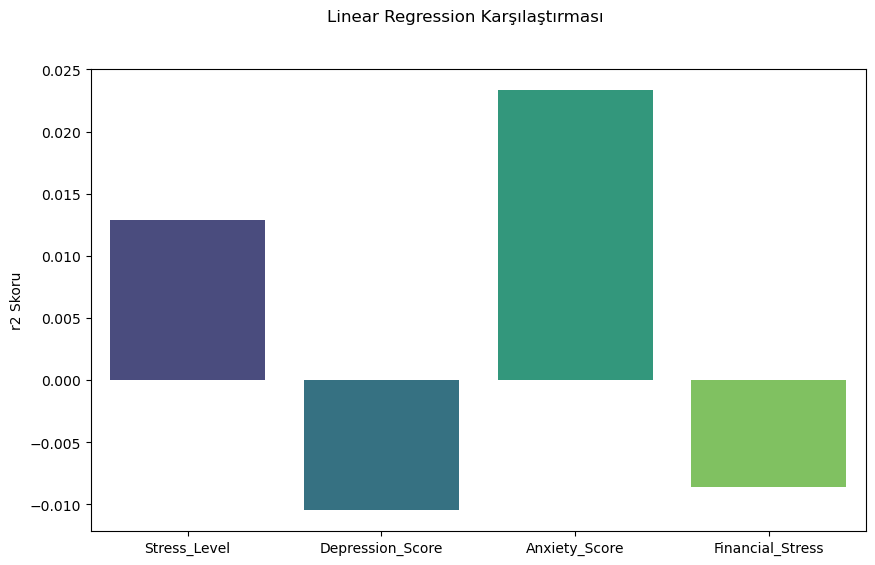

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


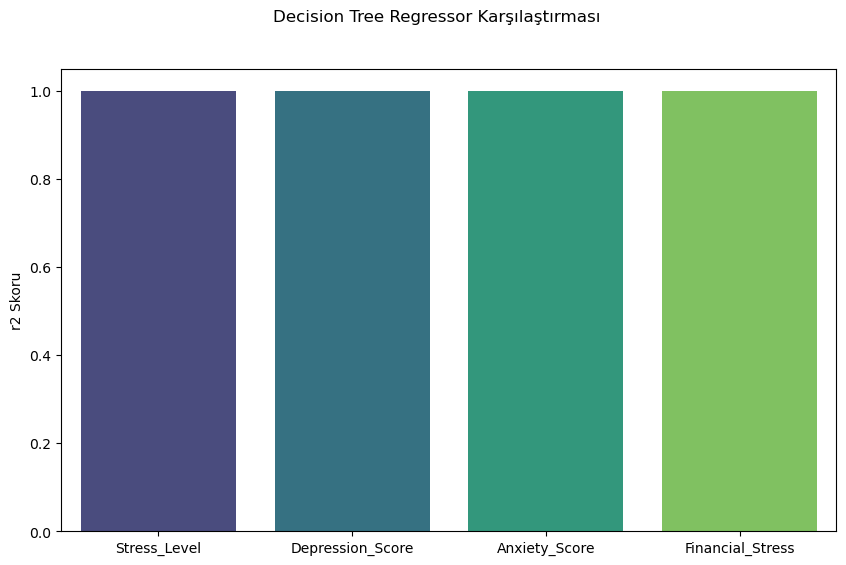

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


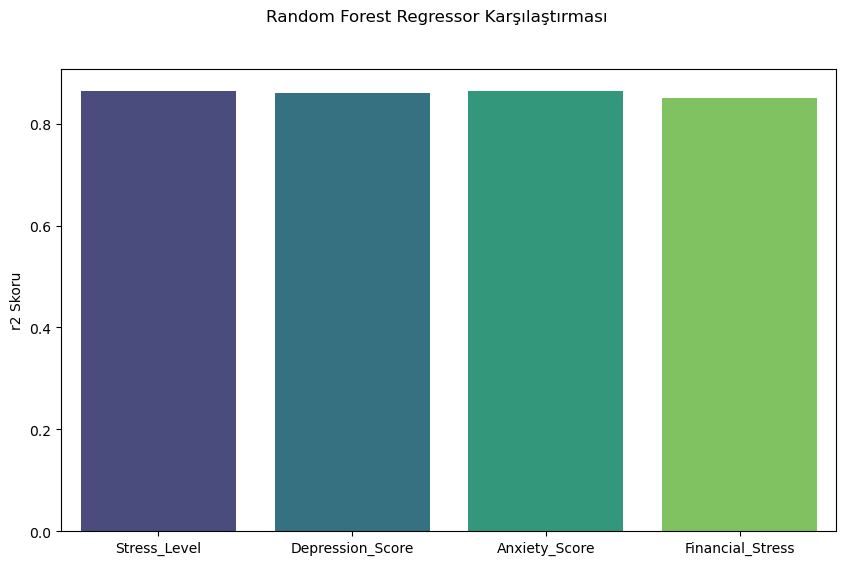

C:\Users\canm2\.conda\envs\artifical\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


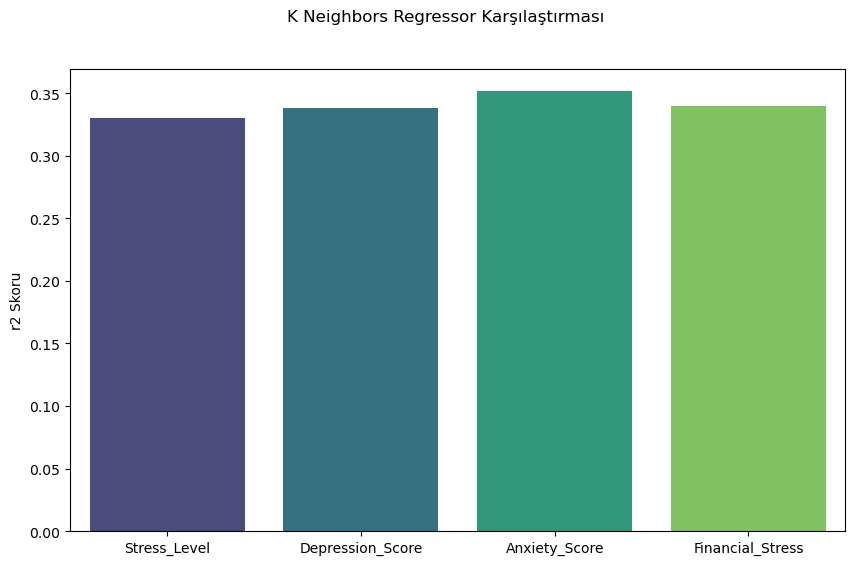

In [47]:
LinearRegression_r2_scores = [LinearRegression_r2_zeroth, LinearRegression_r2_first, LinearRegression_r2_second, LinearRegression_r2_third]
plt.figure(figsize=(10, 6))
sns.barplot(x=yData , y=LinearRegression_r2_scores, palette='viridis')
plt.suptitle(f'Linear Regression Karşılaştırması')
plt.ylabel('r2 Skoru')
plt.show()

DecisionTreeRegressor_r2_scores = [DecisionTreeRegressor_r2_zeroth, DecisionTreeRegressor_r2_first, DecisionTreeRegressor_r2_second, DecisionTreeRegressor_r2_third]
plt.figure(figsize=(10, 6))
sns.barplot(x=yData , y=DecisionTreeRegressor_r2_scores, palette='viridis')
plt.suptitle(f'Decision Tree Regressor Karşılaştırması')
plt.ylabel('r2 Skoru')
plt.show()

RandomForestRegressor_r2_scores = [RandomForestRegressor_r2_zeroth, RandomForestRegressor_r2_first, RandomForestRegressor_r2_second, RandomForestRegressor_r2_third]
plt.figure(figsize=(10, 6))
sns.barplot(x=yData , y=RandomForestRegressor_r2_scores, palette='viridis')
plt.suptitle(f'Random Forest Regressor Karşılaştırması')
plt.ylabel('r2 Skoru')
plt.show()

KNeighborsRegressor_r2_scores = [KNeighborsRegressor_r2_zeroth, KNeighborsRegressor_r2_first, KNeighborsRegressor_r2_second, KNeighborsRegressor_r2_third]
plt.figure(figsize=(10, 6))
sns.barplot(x=yData , y=KNeighborsRegressor_r2_scores, palette='viridis')
plt.suptitle(f'K Neighbors Regressor Karşılaştırması')
plt.ylabel('r2 Skoru')
plt.show()

In [ ]:
model_names_classifiers = ['KNeighbors Classifier', 'GaussianNB', 'Random Forest Classifier']

 
accuracy_scores = [KNeighborsClassifier_accuracy_zeroth, GaussianNB_accuracy_zeroth, RandomForestClassifier_accuracy_zeroth]
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=model_names_classifiers, palette='viridis')
plt.suptitle(f'classifiers Karşılaştırması - {yData}')
plt.ylabel('classifiers Skoru')
plt.show()